# 特征工程

In [21]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../data/train_dataset.csv', encoding='utf-8')
cols = [f for f in data.columns if f not in ['信用分','用户编码']]
X = data[cols]
Y = data['信用分']

## 随即森林进行特征重要度计算

In [4]:
rf = RandomForestRegressor()
rf.fit(X,Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x,4), rf.feature_importances_), cols), reverse = True))

Features sorted by their score:
[(0.4743, '当月通话交往圈人数'), (0.1885, '用户网龄（月）'), (0.1498, '用户近6个月平均消费值（元）'), (0.0338, '用户年龄'), (0.0255, '用户账单当月总费用（元）'), (0.0192, '当月视频播放类应用使用次数'), (0.0178, '当月金融理财类应用使用总次数'), (0.0171, '当月网购类应用使用次数'), (0.0166, '用户当月账户余额（元）'), (0.0136, '近三个月月均商场出现次数'), (0.0088, '缴费用户最近一次缴费金额（元）'), (0.0083, '用户话费敏感度'), (0.0076, '当月旅游资讯类应用使用次数'), (0.0024, '当月是否景点游览'), (0.0023, '缴费用户当前是否欠费缴费'), (0.0022, '当月是否体育场馆消费'), (0.002, '是否4G不健康客户'), (0.002, '当月是否看电影'), (0.0018, '是否经常逛商场的人'), (0.0014, '用户最近一次缴费距今时长（月）'), (0.0011, '当月火车类应用使用次数'), (0.0008, '是否黑名单客户'), (0.0008, '当月是否逛过福州仓山万达'), (0.0007, '当月物流快递类应用使用次数'), (0.0006, '当月飞机类应用使用次数'), (0.0006, '当月是否到过福州山姆会员店'), (0.0003, '用户实名制是否通过核实'), (0.0002, '是否大学生客户')]


In [9]:
stats = []
for col in data.columns:
    stats.append((col, data[col].nunique(), data[col].isnull().sum() * 100 / data.shape[0], data[col].value_counts(normalize=True, dropna=False).values[0] * 100, data[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Unique_values', ascending=False)[:]

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
0,用户编码,50000,0.0,0.002,object
9,用户近6个月平均消费值（元）,18267,0.0,0.396,float64
10,用户账单当月总费用（元）,11330,0.0,2.248,float64
25,当月视频播放类应用使用次数,11000,0.0,17.340,int64
22,当月网购类应用使用次数,6148,0.0,15.972,int64
24,当月金融理财类应用使用总次数,5669,0.0,18.282,int64
28,当月旅游资讯类应用使用次数,676,0.0,61.180,int64
14,当月通话交往圈人数,464,0.0,1.802,int64
8,缴费用户最近一次缴费金额（元）,326,0.0,29.510,float64
6,用户网龄（月）,283,0.0,1.220,int64


In [10]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [16]:
boston = pd.read_csv('../data/train_dataset.csv')
test = pd.read_csv('../data/test_dataset.csv')
test = test.drop(['用户编码'],axis=1)
boston = boston.drop(['用户编码'],axis=1)
boston = boston.fillna(-1)
cols = [f for f in boston.columns if f != '信用分']
X = boston[cols]
Y = boston["信用分"]
print(boston.shape)
data_all = pd.concat([boston, test], axis=0, ignore_index=True)

(50000, 29)


/home/hmj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # Remove the CWD from sys.path while we load stuff.


#### 数据分布图

In [47]:
def plt_cnt(df_data, idx):
    cnt = df_data[idx].value_counts(dropna=False).sort_index(ascending=True)
    print(len(cnt))
    if len(cnt) < 1000:
        plt.figure(figsize=(30,5))
        cnt.plot.bar()
        plt.title(idx)
        plt.show()

用户实名制是否通过核实
2


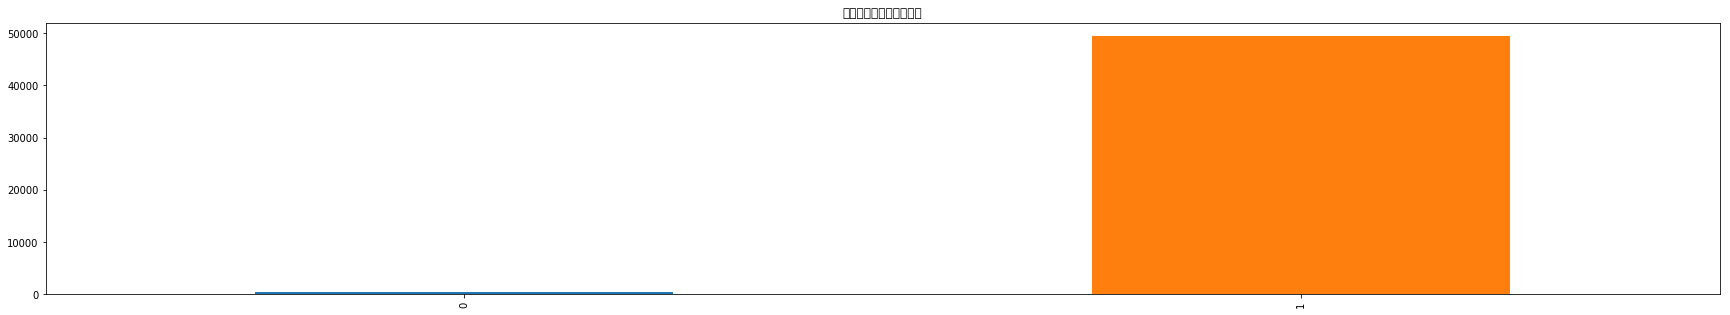

用户年龄
84


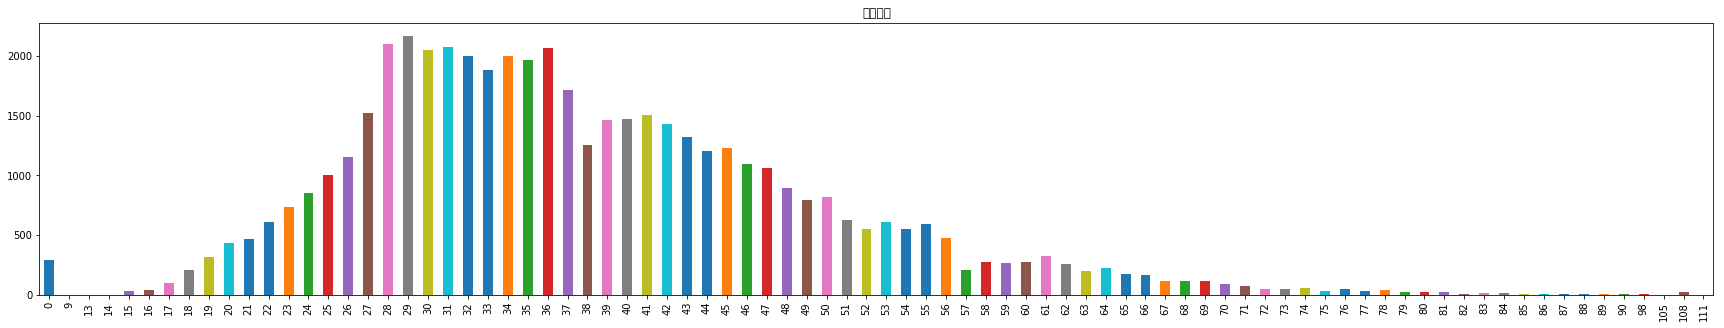

是否大学生客户
2


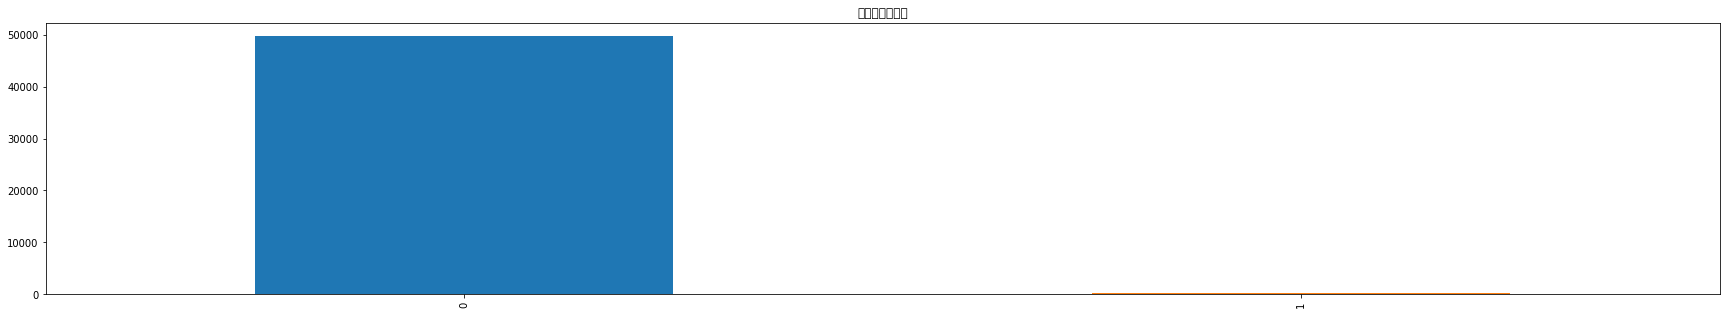

是否黑名单客户
2


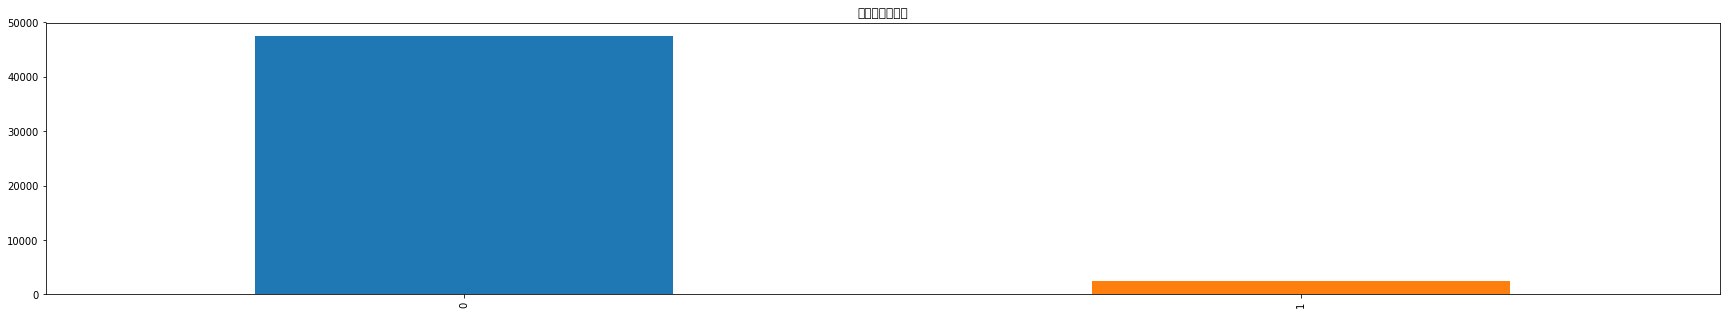

是否4G不健康客户
2


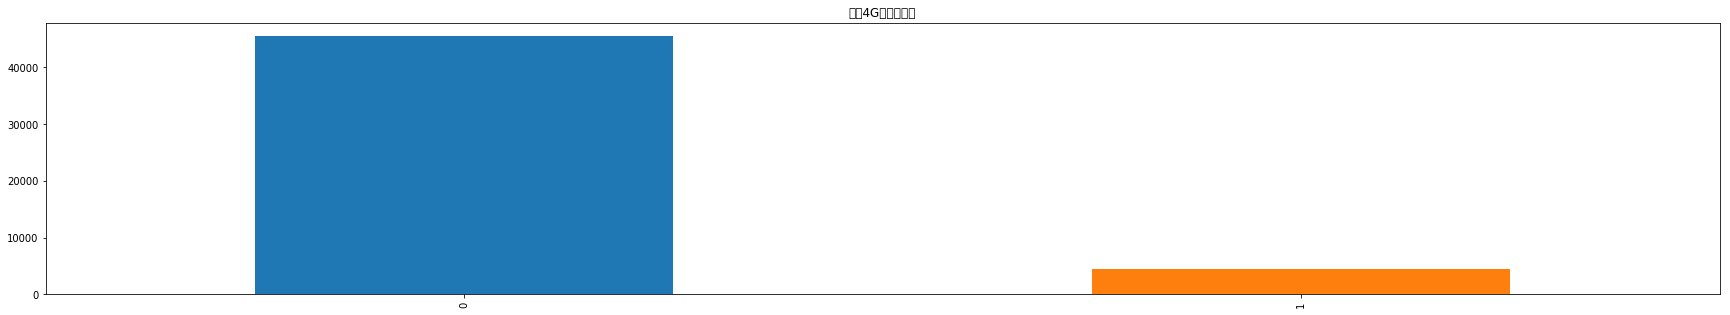

用户网龄（月）
283


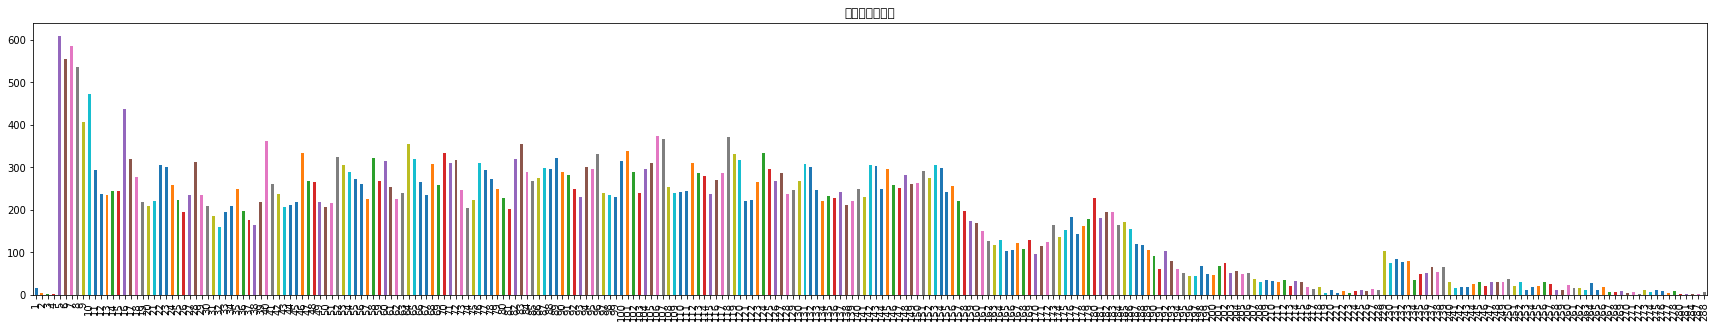

用户最近一次缴费距今时长（月）
2


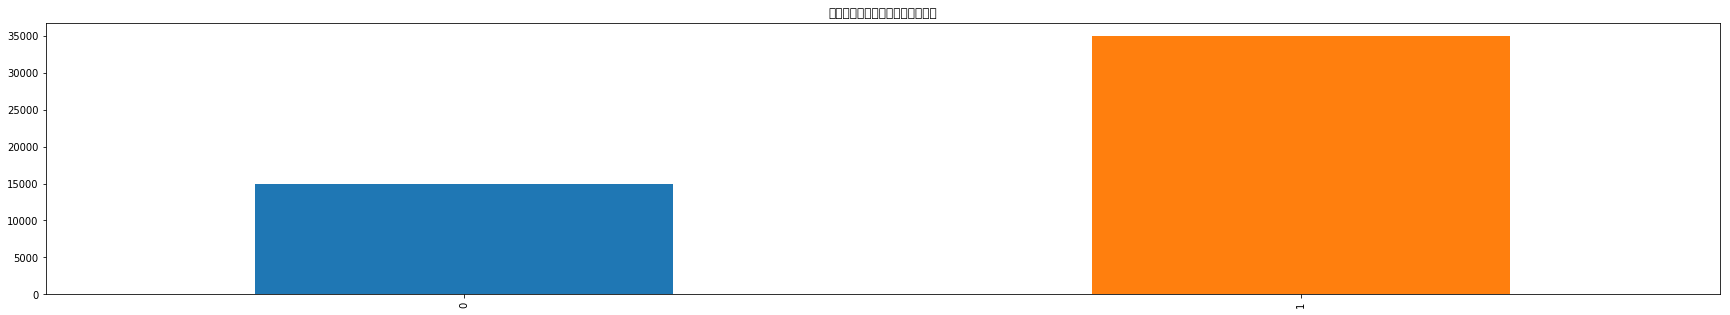

缴费用户最近一次缴费金额（元）
326


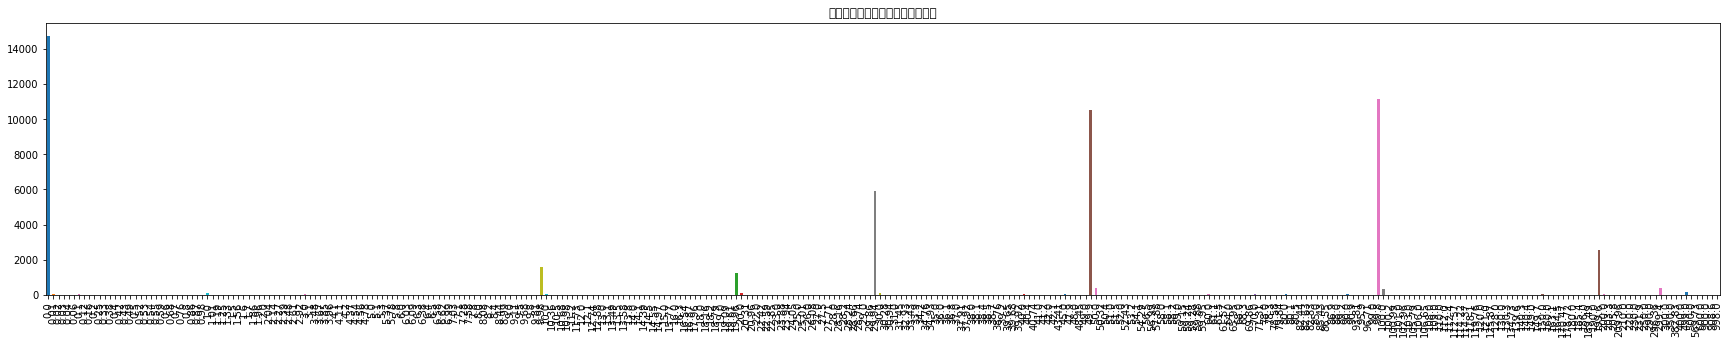

用户账单当月总费用（元）
11330
用户当月账户余额（元）
236


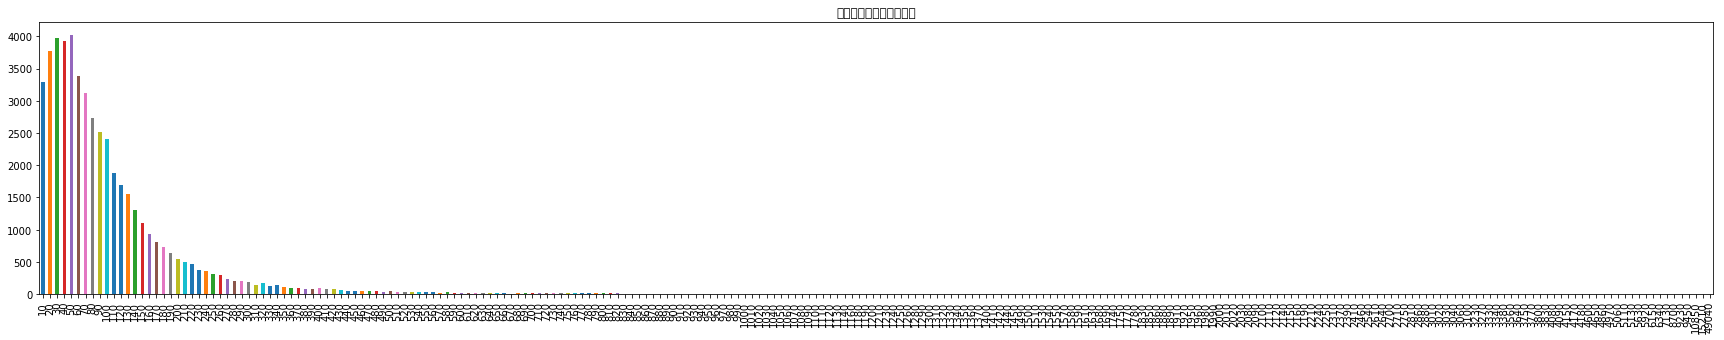

缴费用户当前是否欠费缴费
2


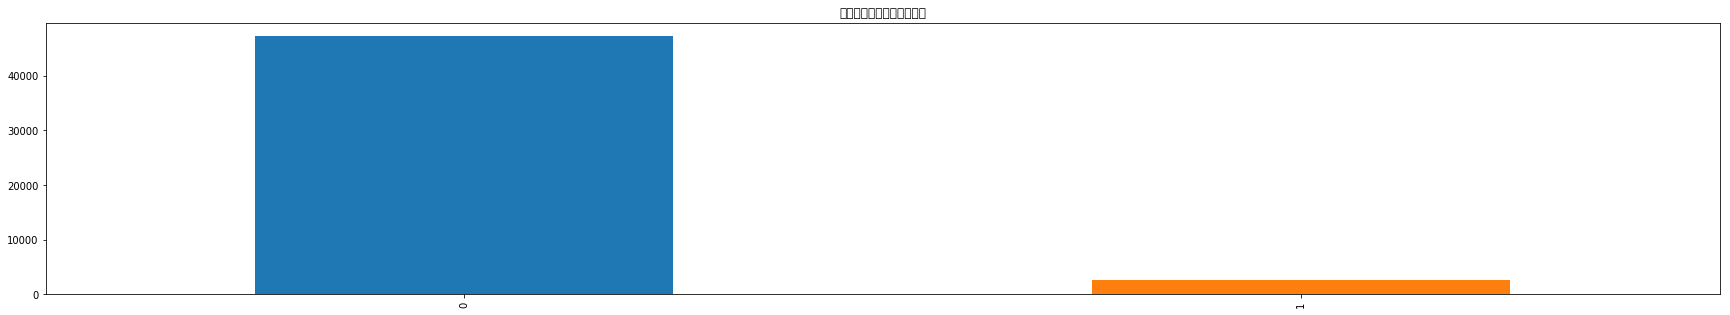

用户话费敏感度
6


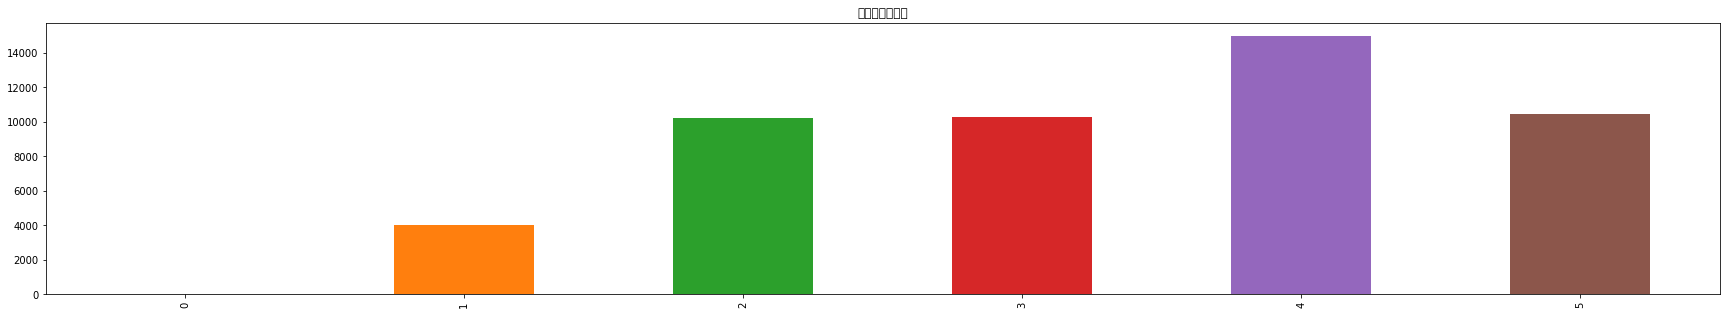

当月通话交往圈人数
464


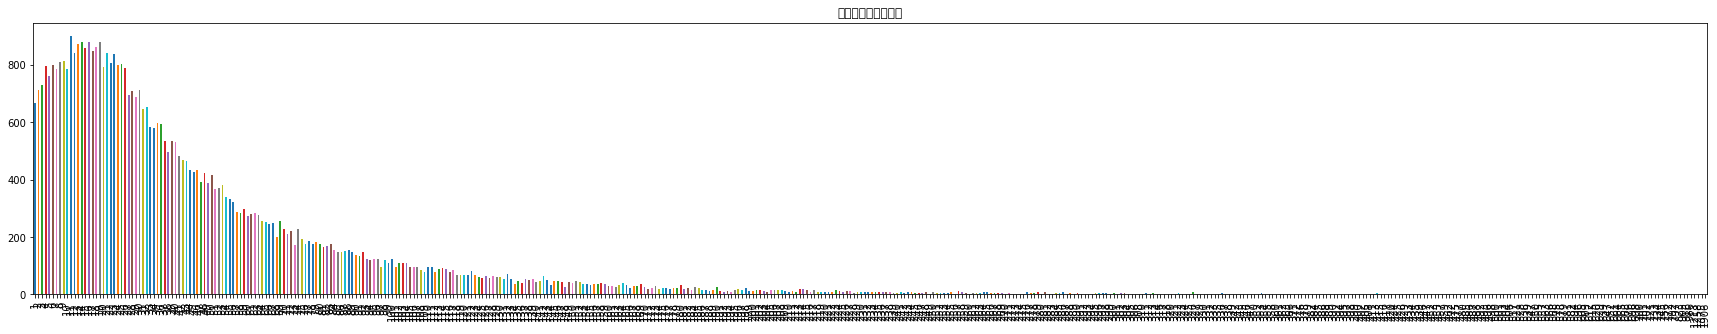

是否经常逛商场的人
2


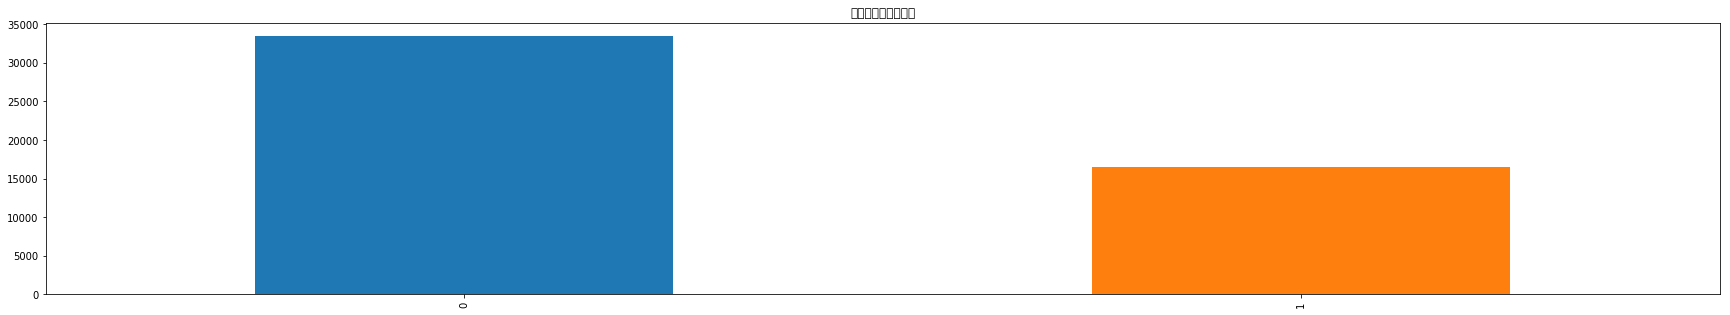

近三个月月均商场出现次数
93


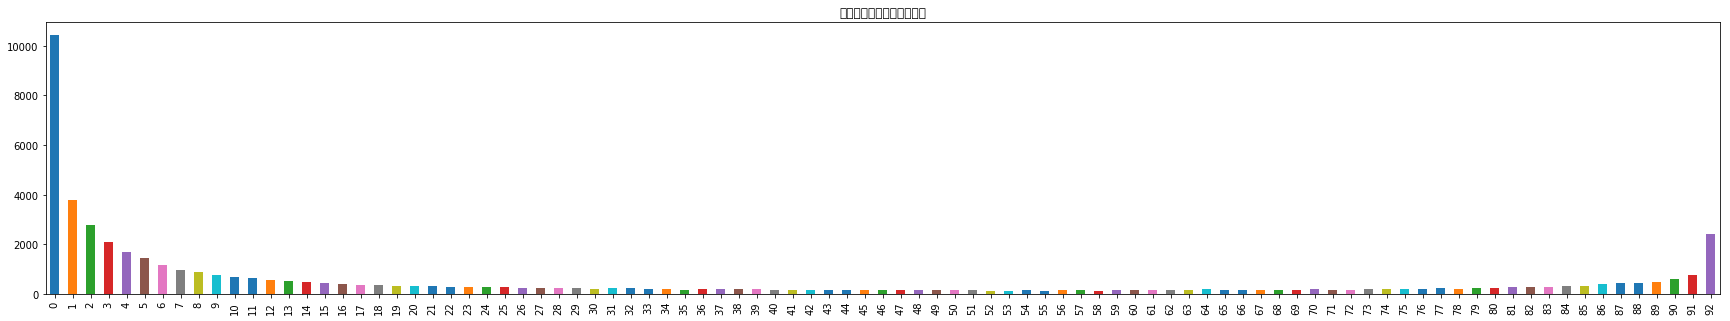

当月是否逛过福州仓山万达
2


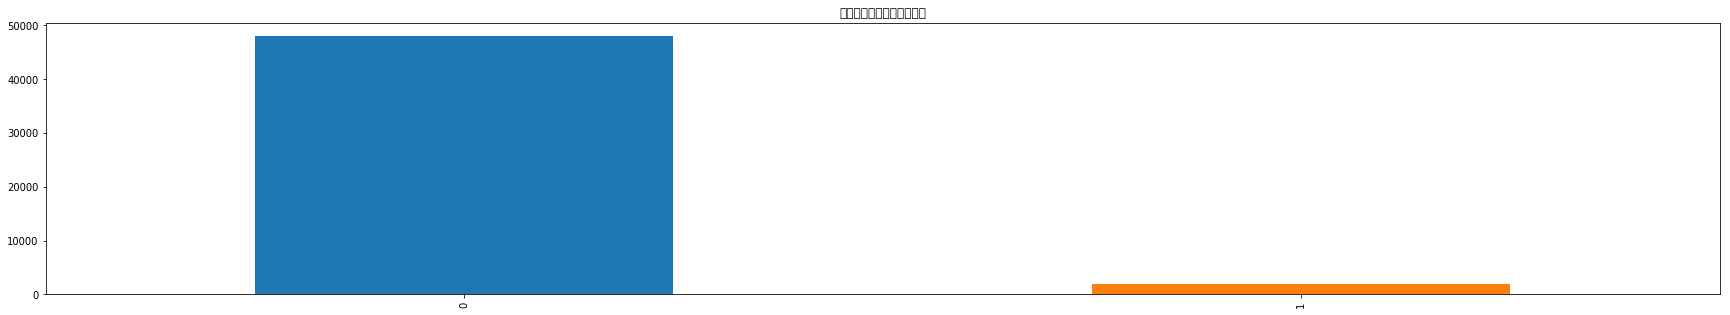

当月是否到过福州山姆会员店
2


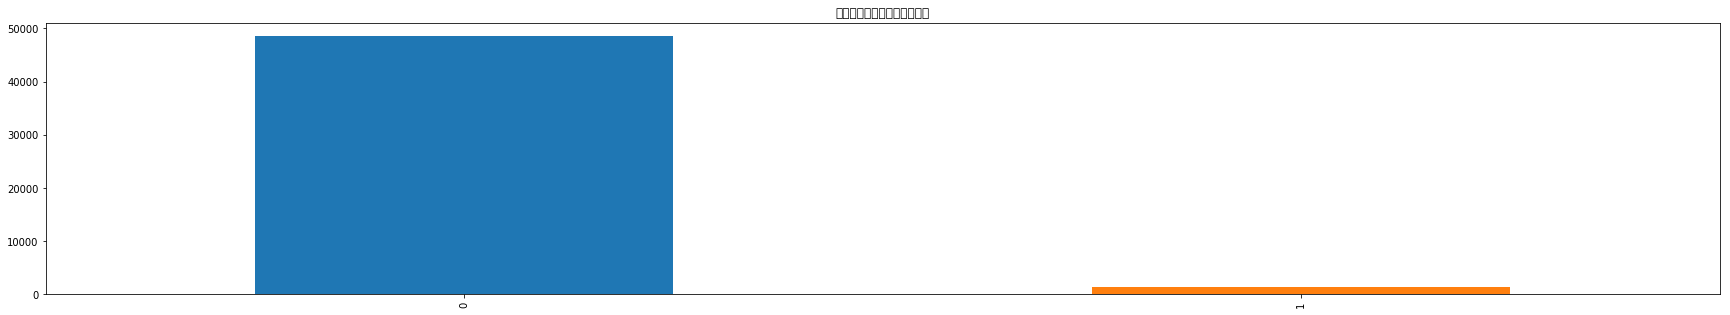

当月是否看电影
2


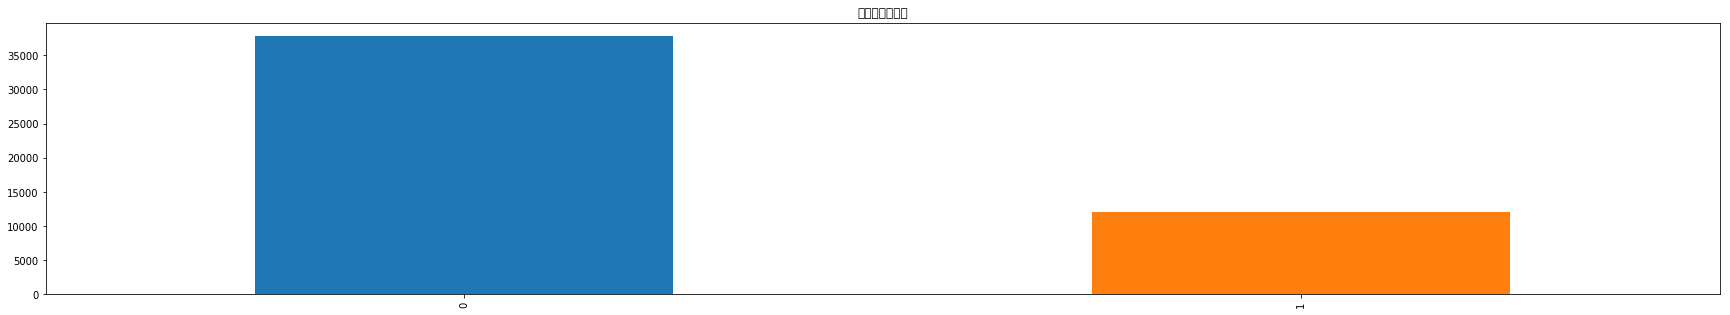

当月是否景点游览
2


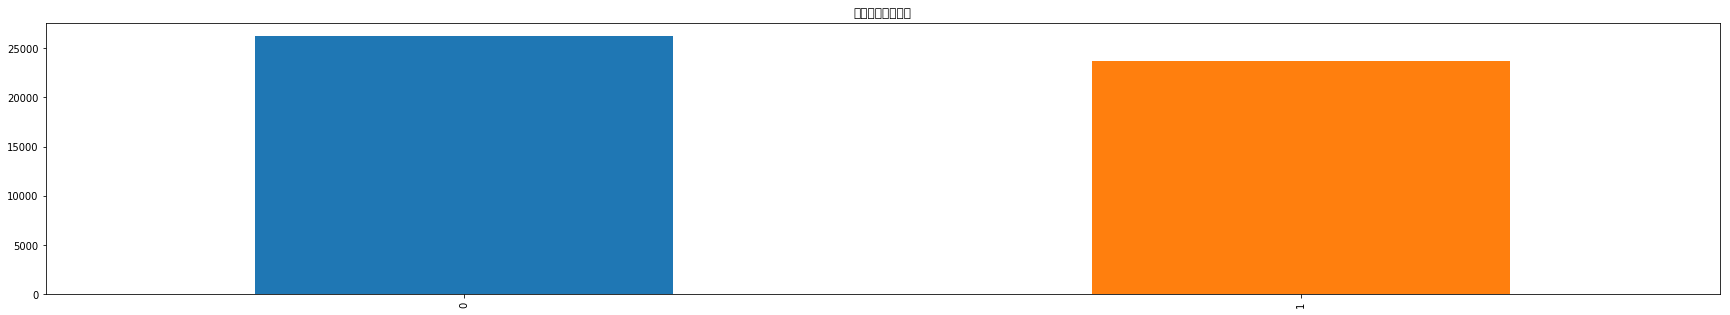

当月是否体育场馆消费
2


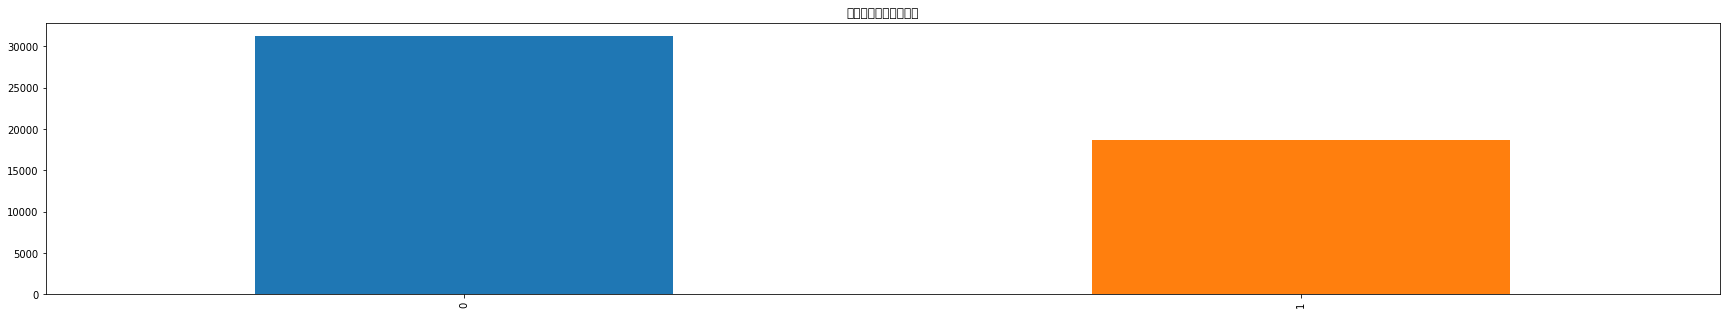

当月网购类应用使用次数
6148
当月物流快递类应用使用次数
192


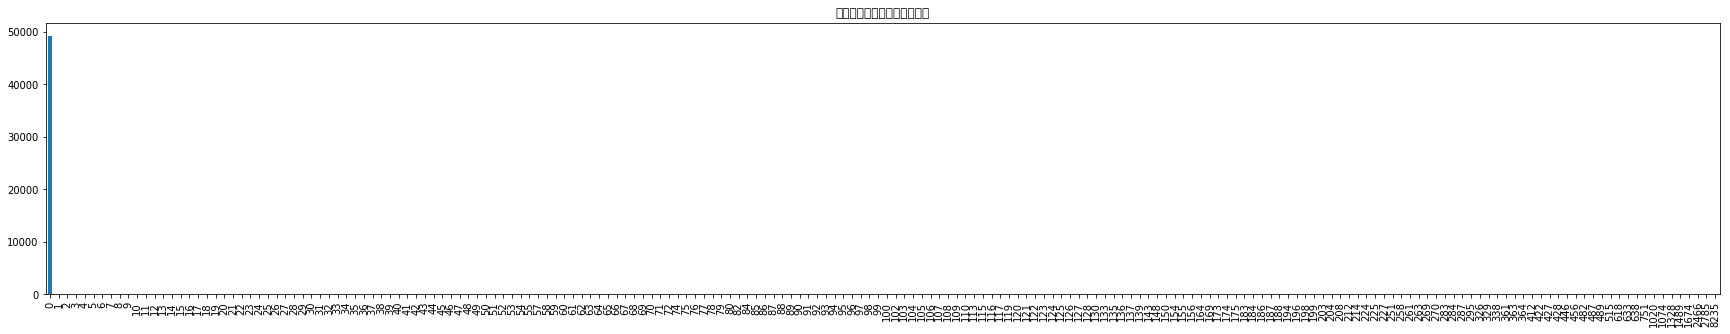

当月金融理财类应用使用总次数
5669
当月视频播放类应用使用次数
11000
当月飞机类应用使用次数
150


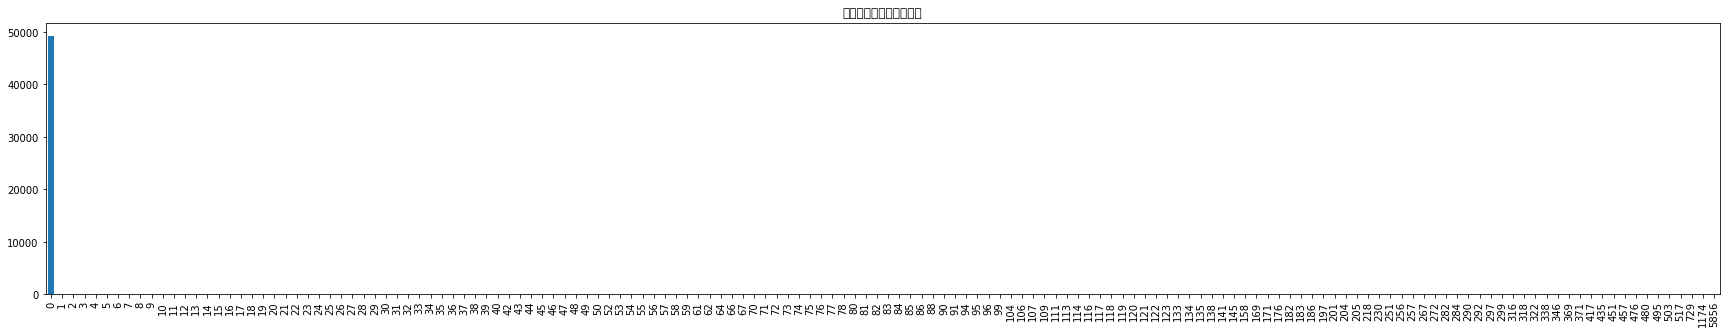

当月火车类应用使用次数
139


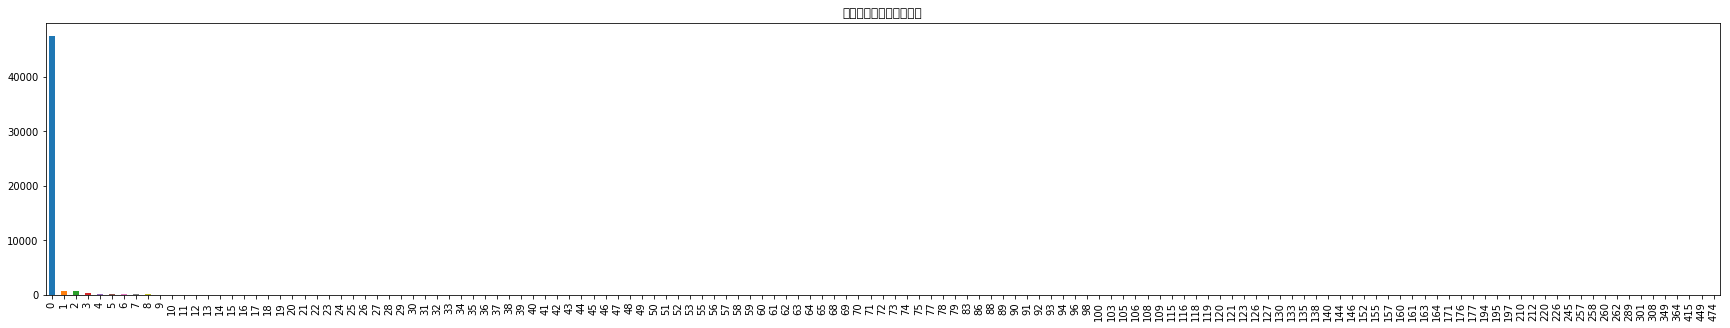

当月旅游资讯类应用使用次数
676


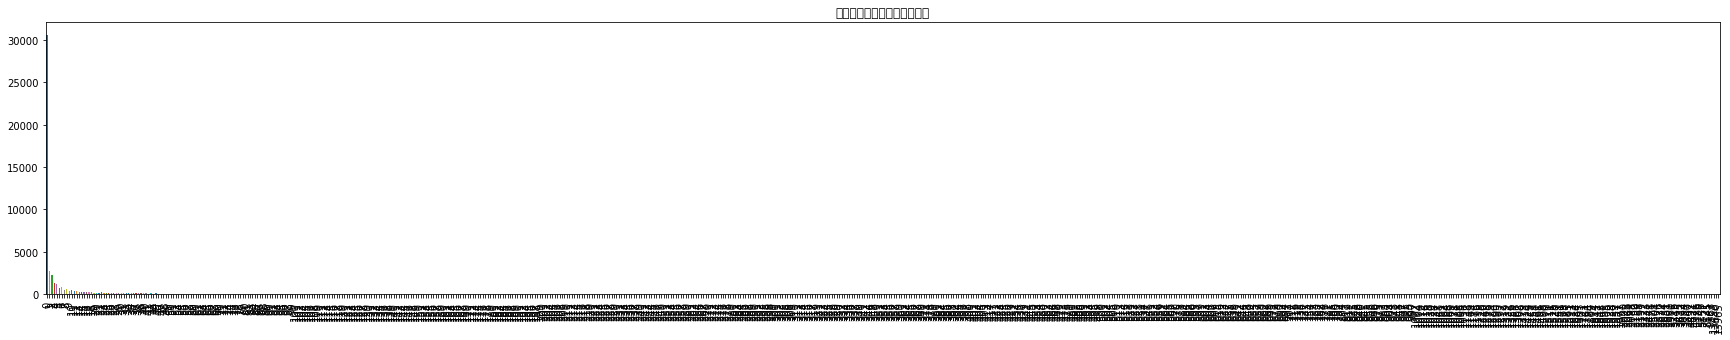

信用分
278


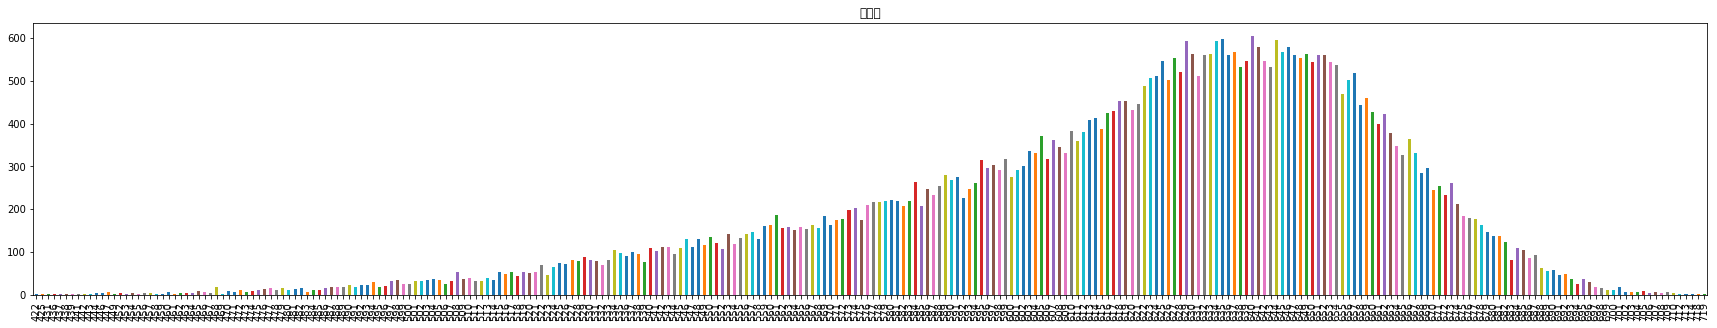

In [48]:
for f in boston.columns:
    if f != '用户近6个月平均消费值（元）':
        print(f)
        plt_cnt(boston, f)

#### A与B的统计图

In [49]:
def plt_A_B(df_data, idx_A, idx_B, bias):
    plt.figure(figsize=(18,5))
    (df_data.groupby(idx_A)[idx_B].mean() - bias).plot.bar()
    plt.title(idx_B)
    plt.show()

用户实名制是否通过核实


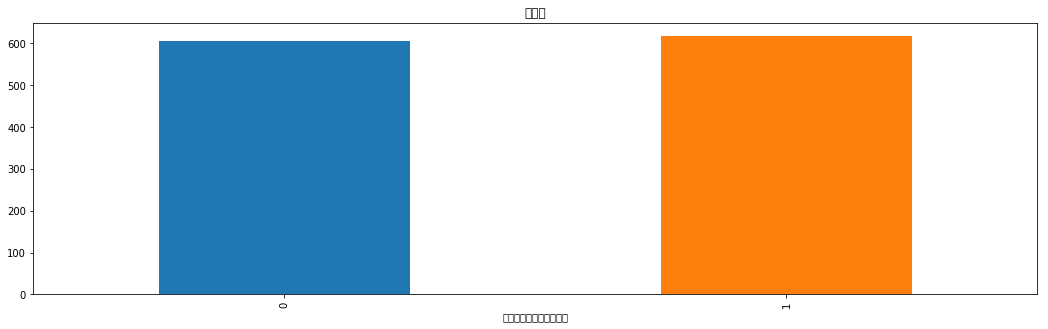

用户年龄


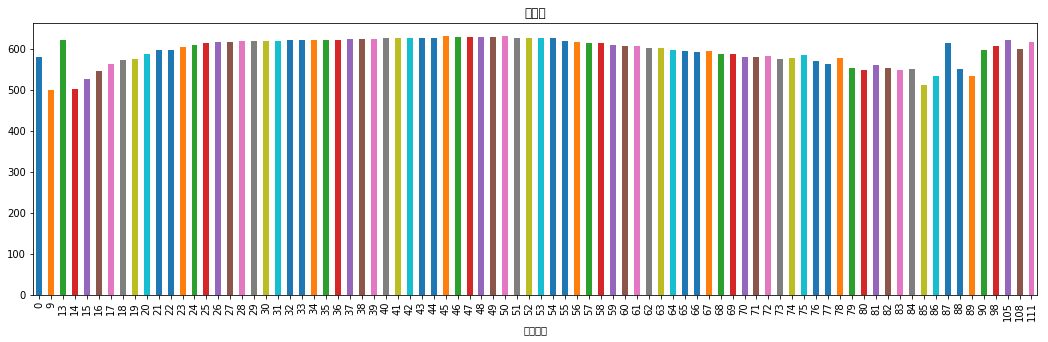

是否大学生客户


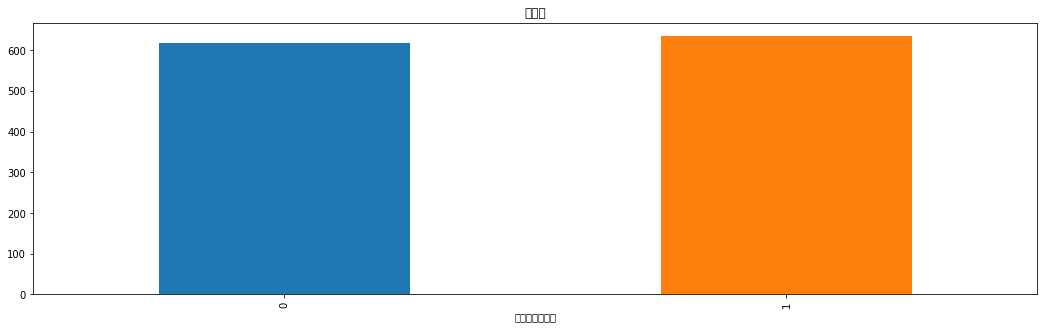

是否黑名单客户


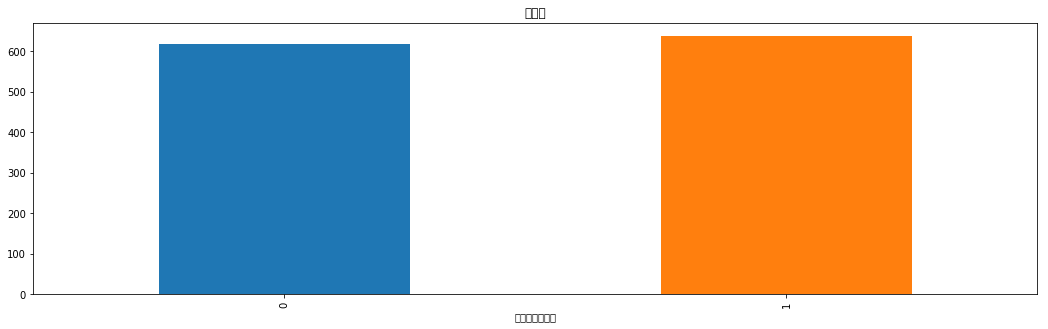

是否4G不健康客户


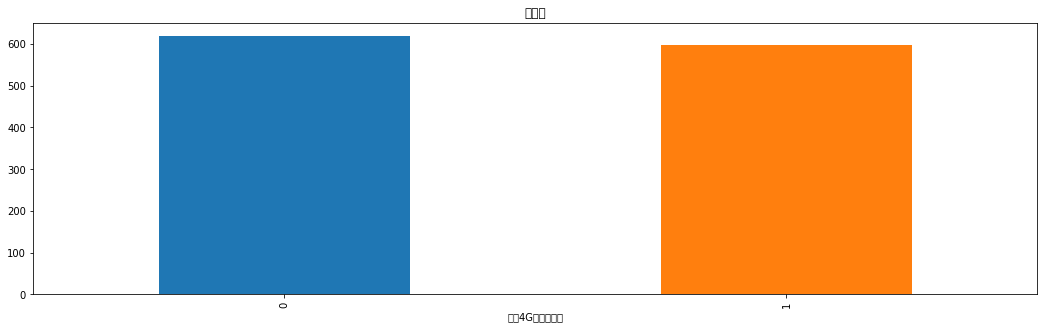

用户网龄（月）


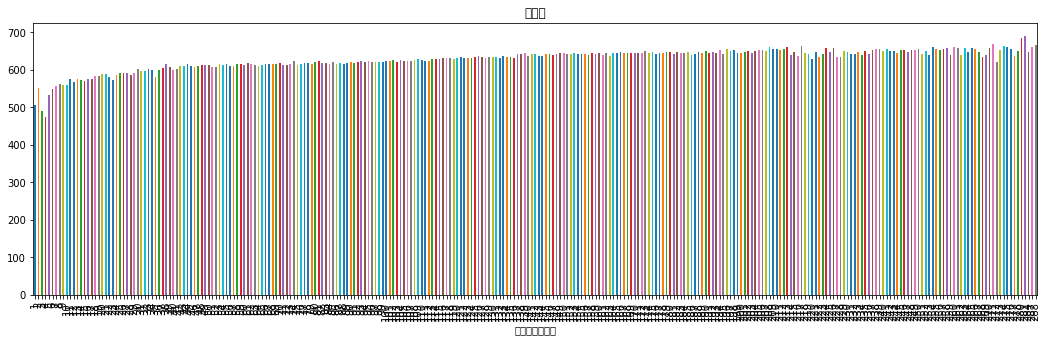

用户最近一次缴费距今时长（月）


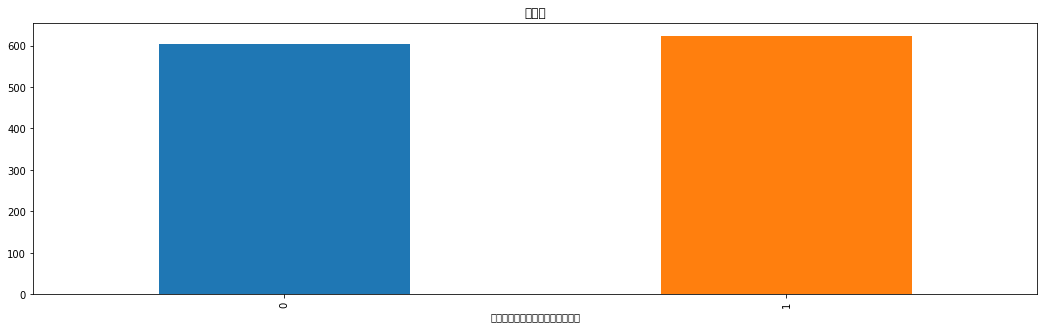

缴费用户最近一次缴费金额（元）


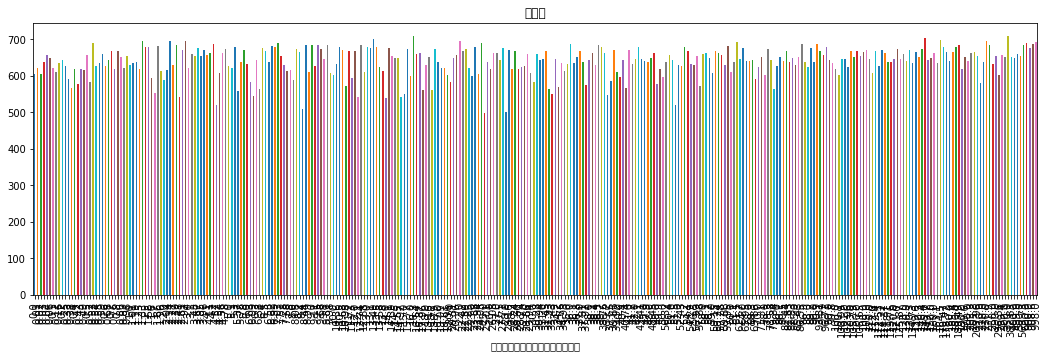

用户近6个月平均消费值（元）


KeyboardInterrupt: 

In [50]:
for f in boston.columns:
    if f not in ['用户编码', '信用分']:
        print(f)
        plt_A_B(boston, f, '信用分', 0)

#### A与B的散点图

In [54]:
def plt_point_A_B(df_data, idx_A, idx_B):
#     plt.figure(figsize=(18,5))
    df_data.plot(kind='scatter', x=idx_A, y=idx_B, figsize=(18,5))
    plt.show()

用户实名制是否通过核实


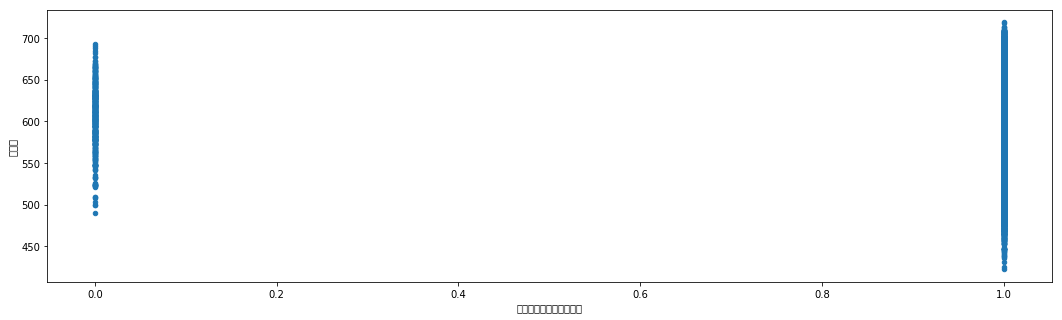

用户年龄


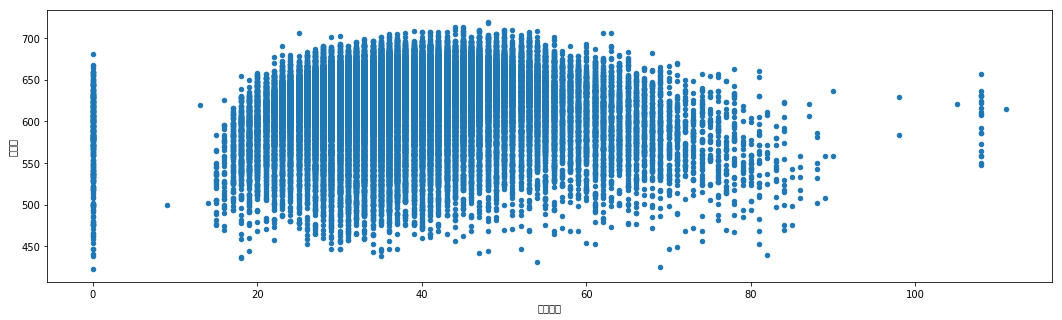

是否大学生客户


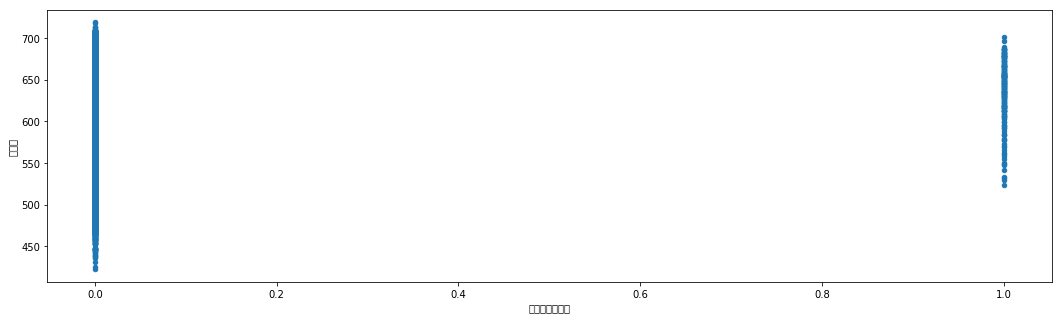

是否黑名单客户


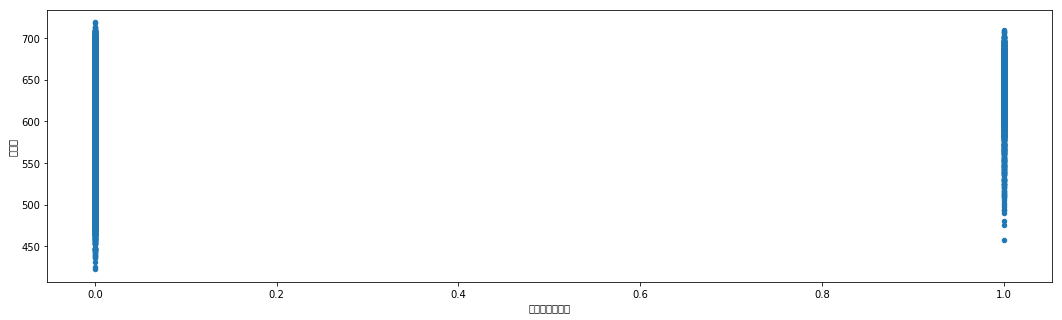

是否4G不健康客户


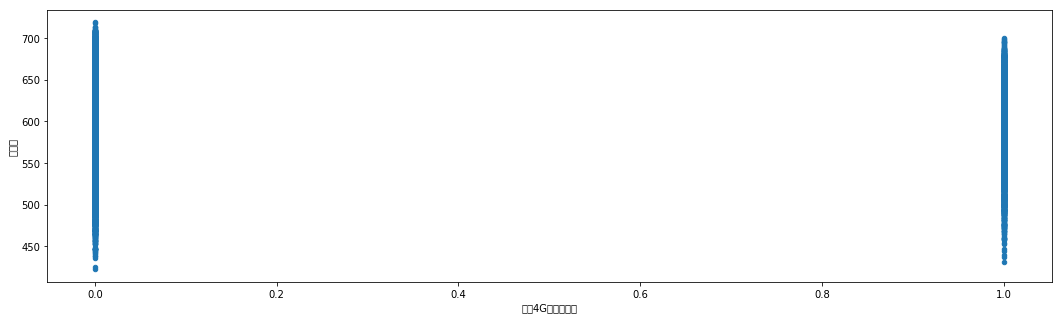

用户网龄（月）


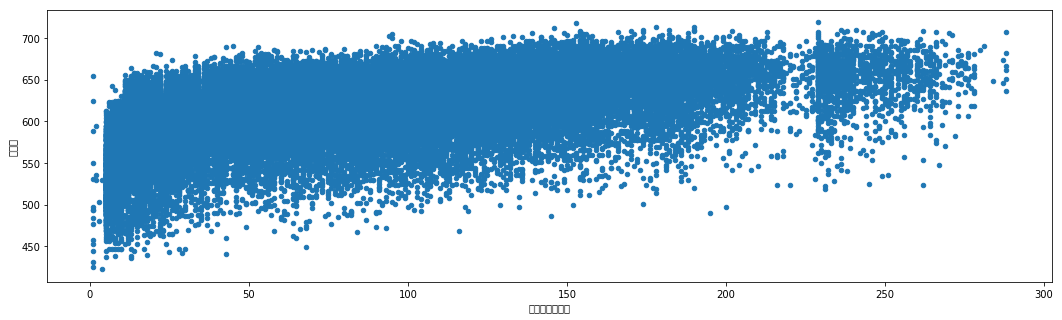

用户最近一次缴费距今时长（月）


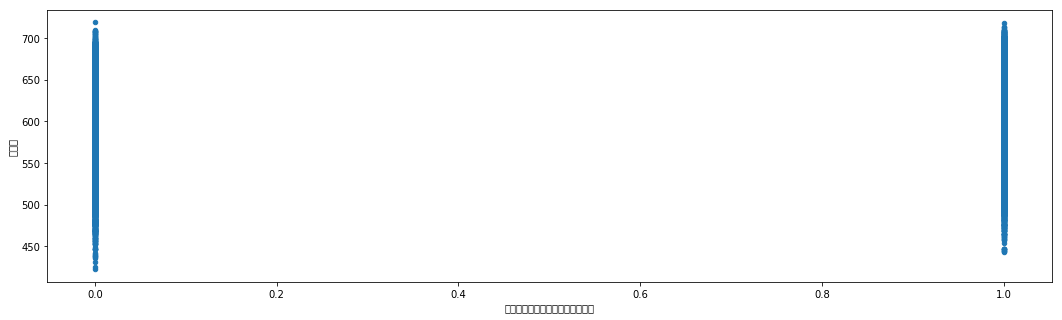

缴费用户最近一次缴费金额（元）


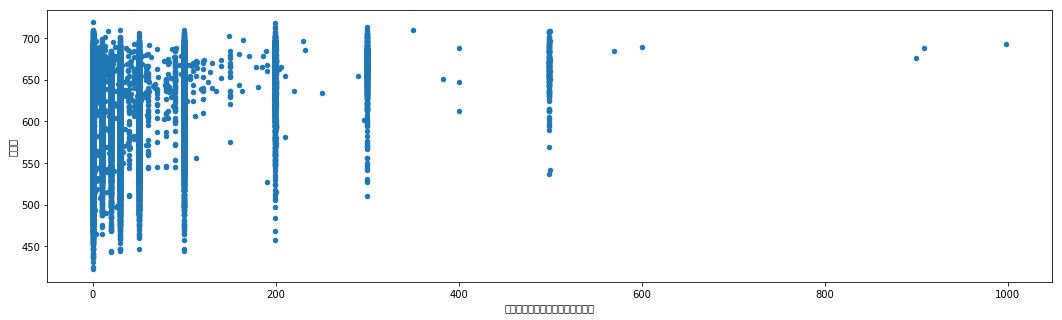

用户近6个月平均消费值（元）


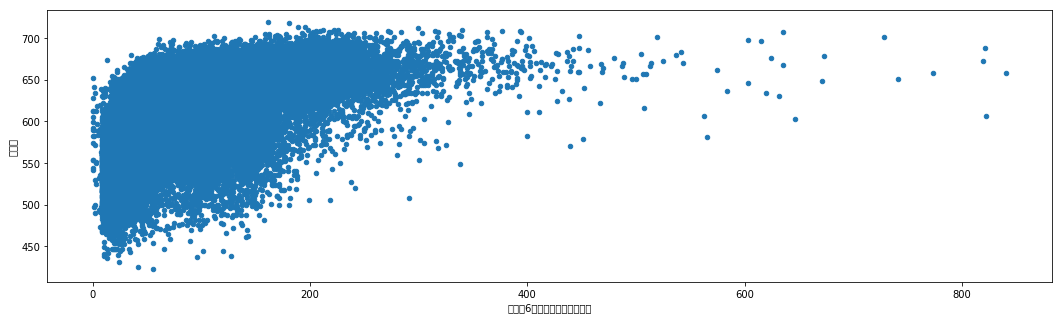

用户账单当月总费用（元）


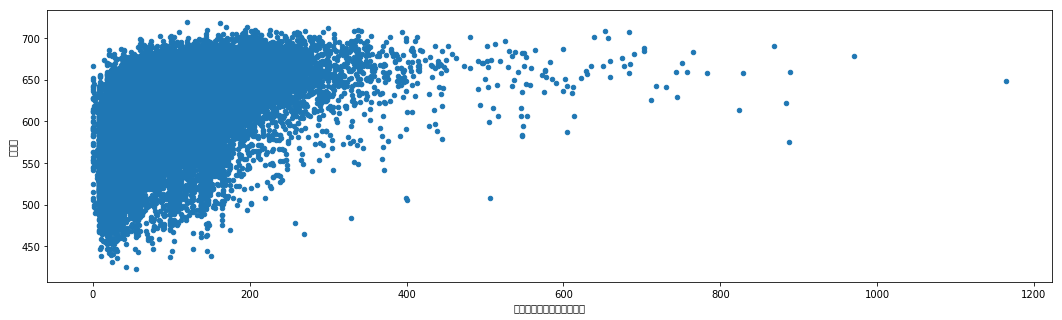

用户当月账户余额（元）


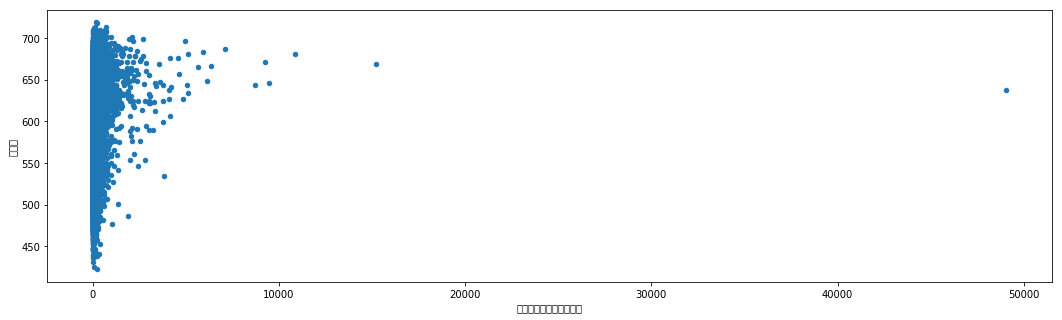

缴费用户当前是否欠费缴费


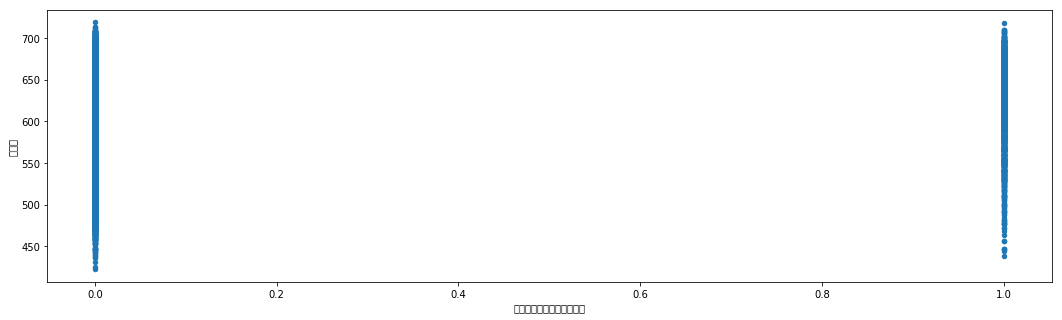

用户话费敏感度


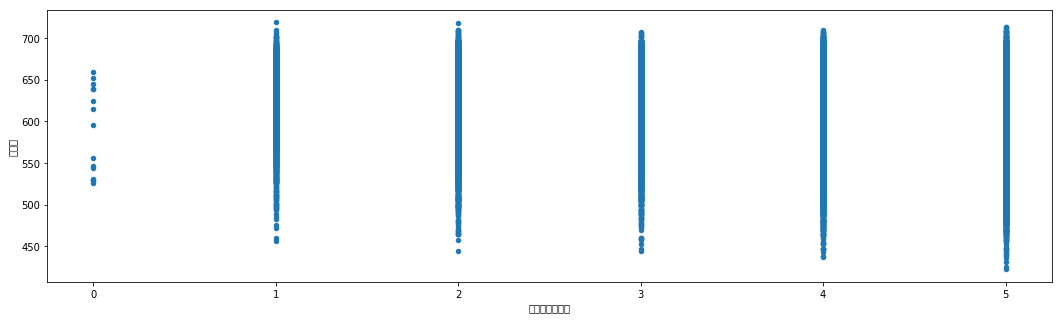

当月通话交往圈人数


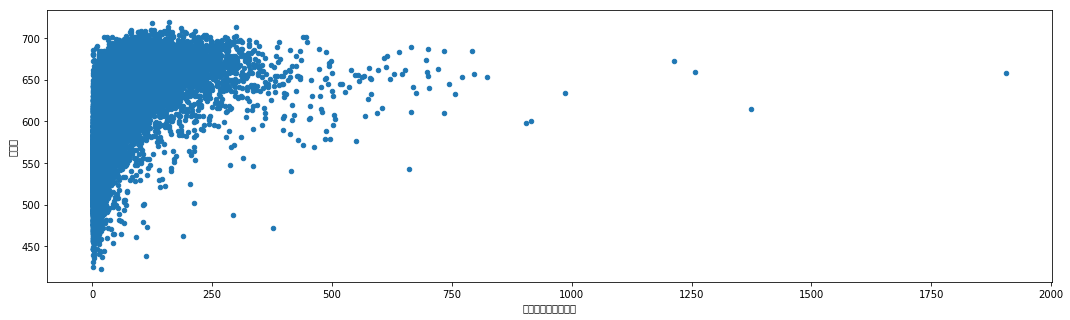

是否经常逛商场的人


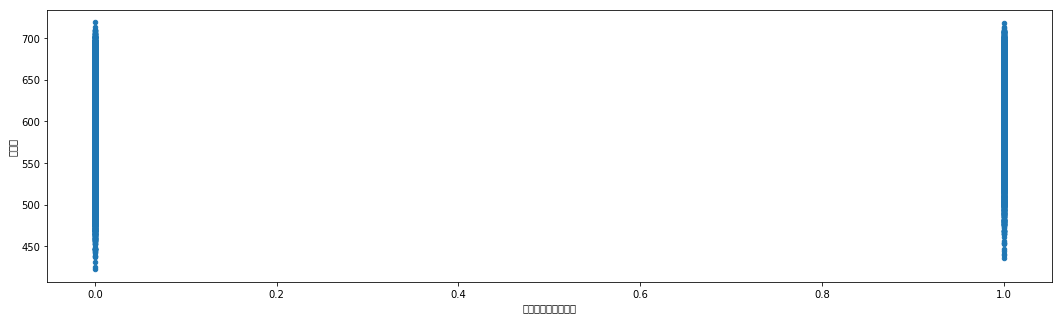

近三个月月均商场出现次数


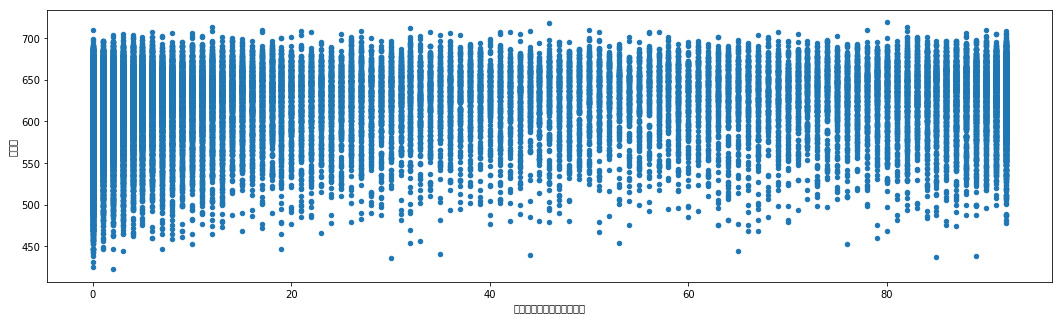

当月是否逛过福州仓山万达


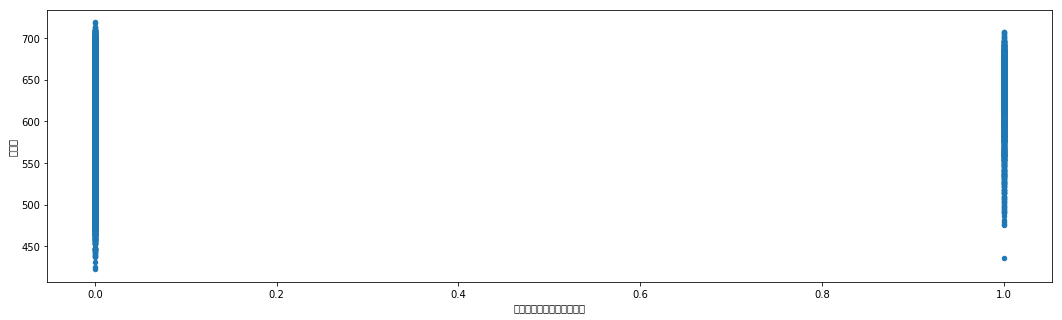

当月是否到过福州山姆会员店


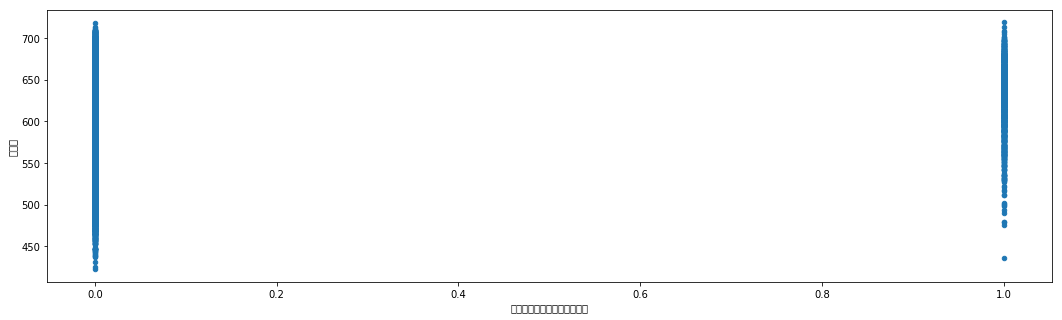

当月是否看电影


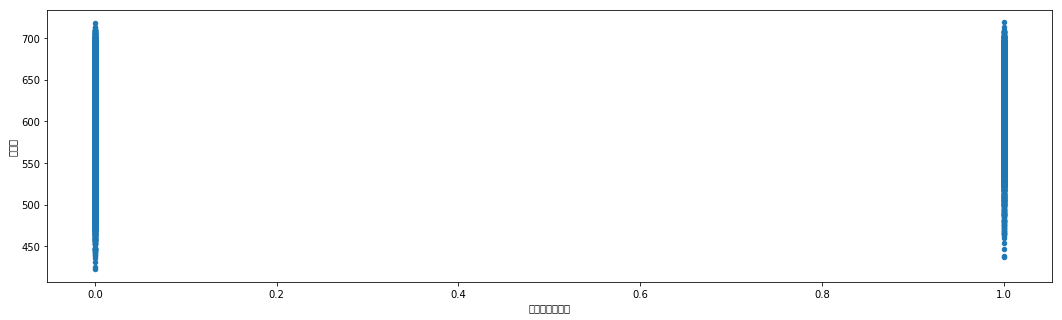

当月是否景点游览


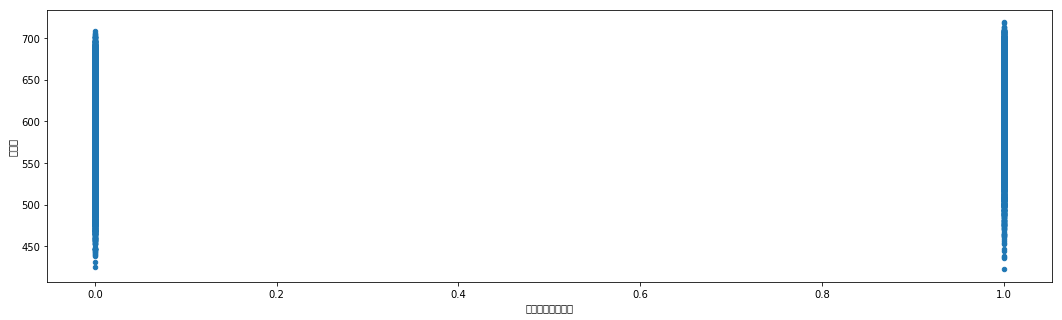

当月是否体育场馆消费


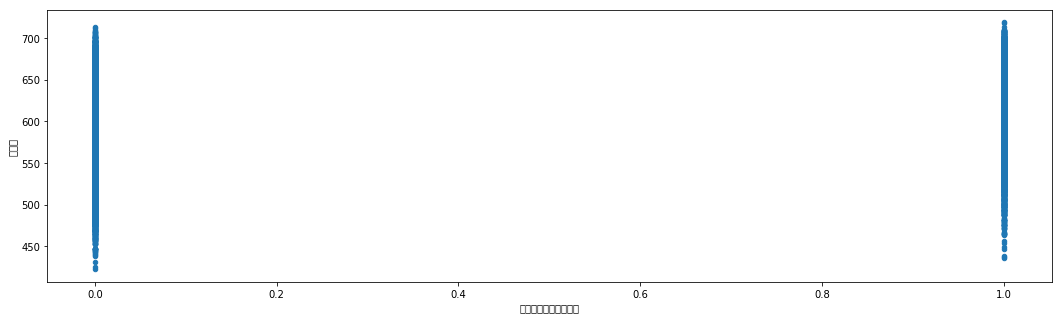

当月网购类应用使用次数


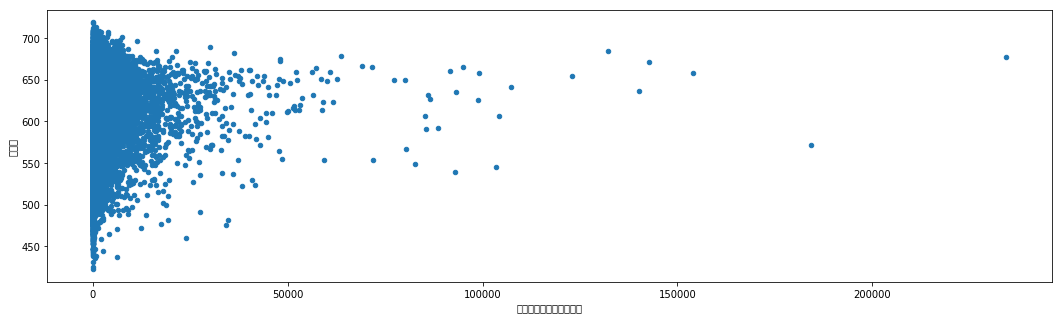

当月物流快递类应用使用次数


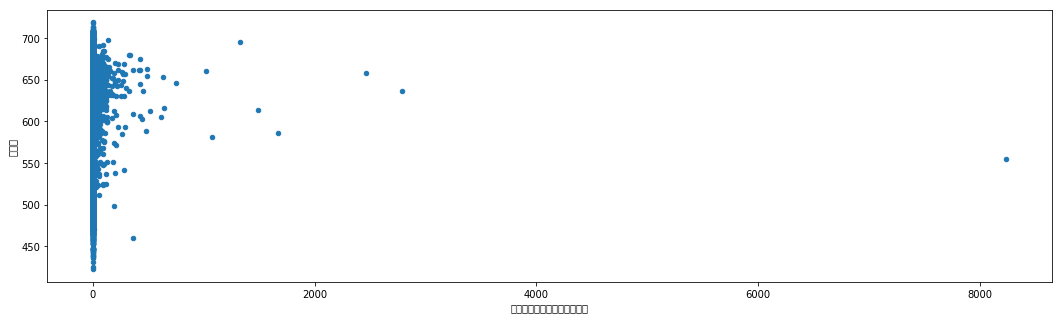

当月金融理财类应用使用总次数


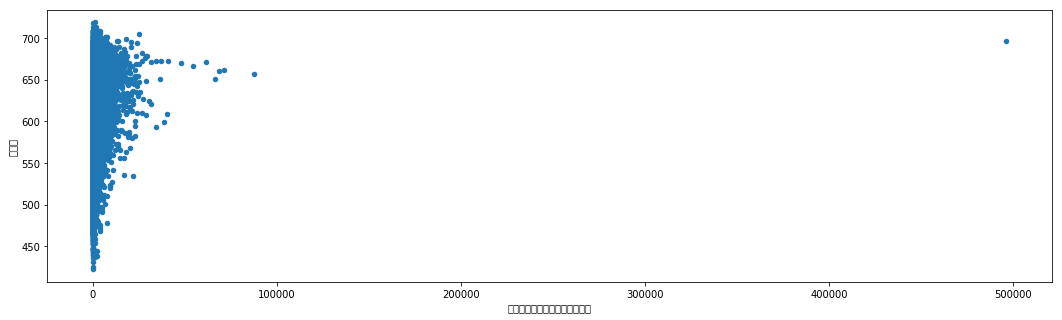

当月视频播放类应用使用次数


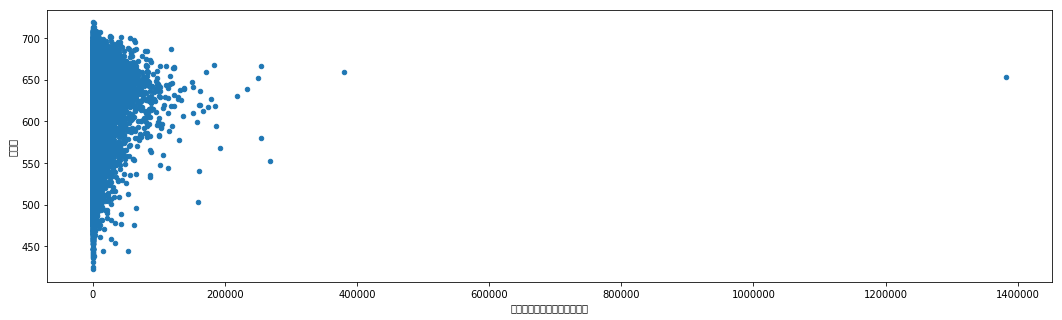

当月飞机类应用使用次数


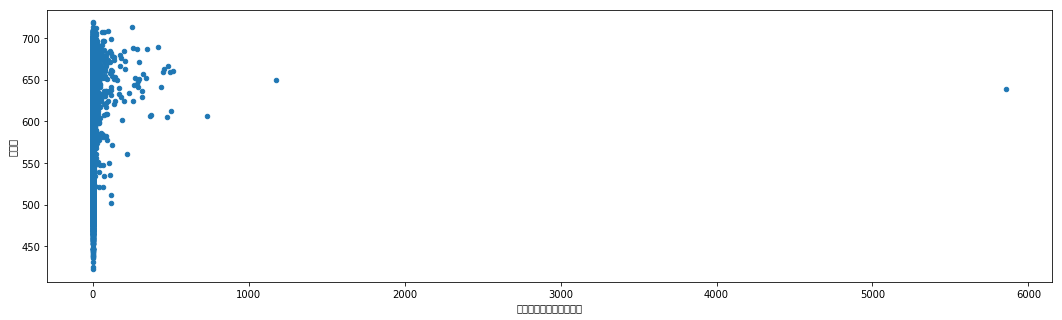

当月火车类应用使用次数


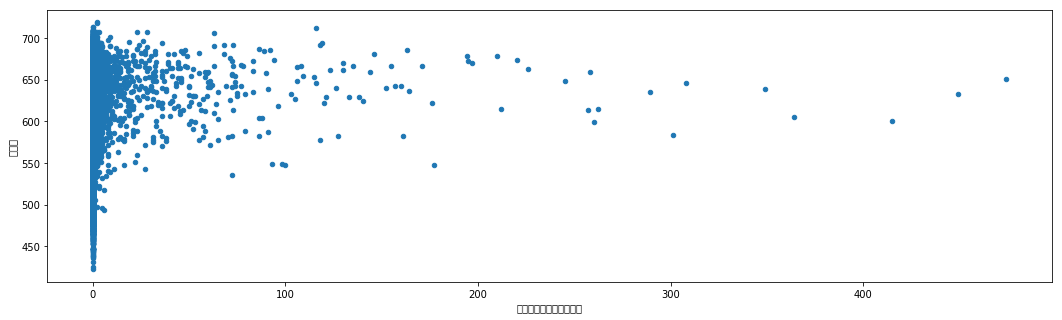

当月旅游资讯类应用使用次数


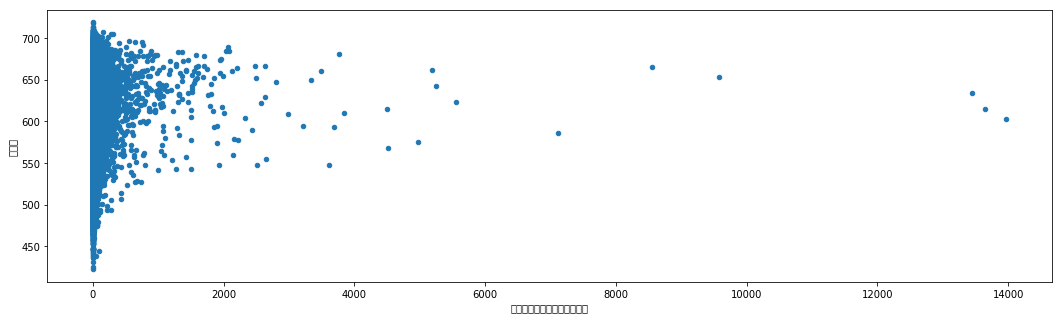

信用分


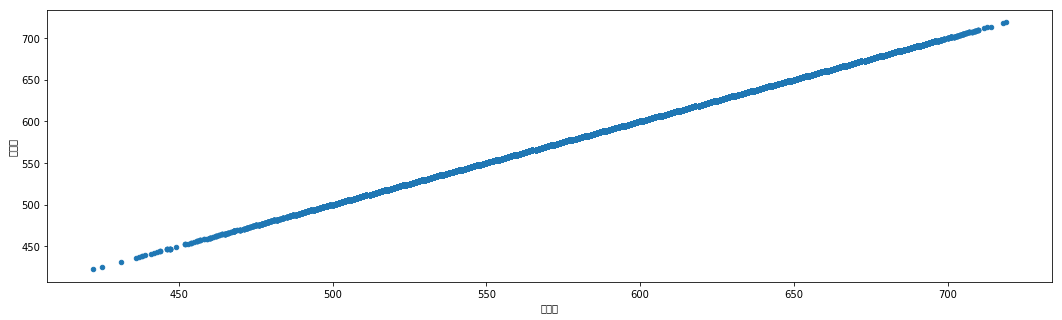

In [55]:
for f in boston.columns:
    print(f)
    plt_point_A_B(boston, f, '信用分')

用户实名制是否通过核实
2


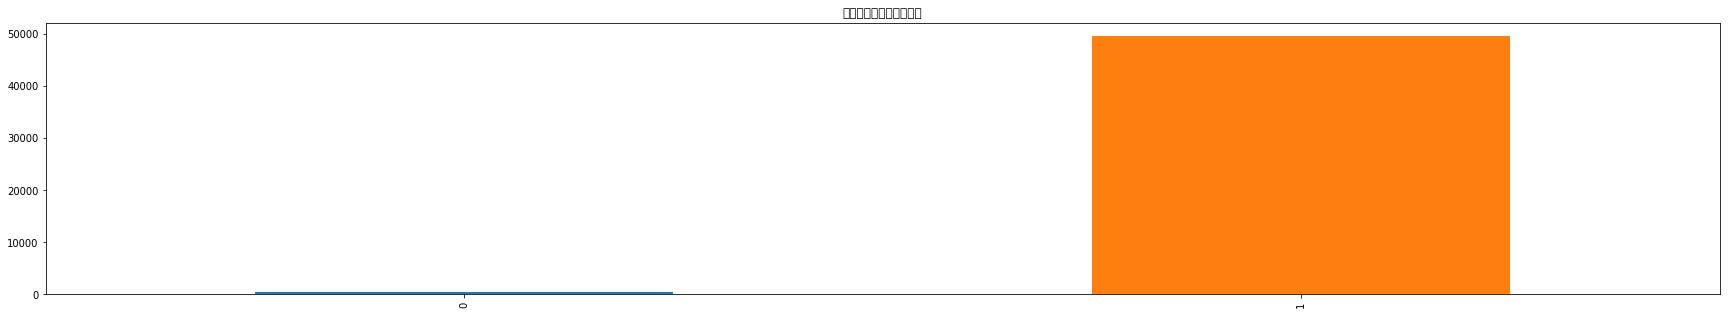

用户年龄
83


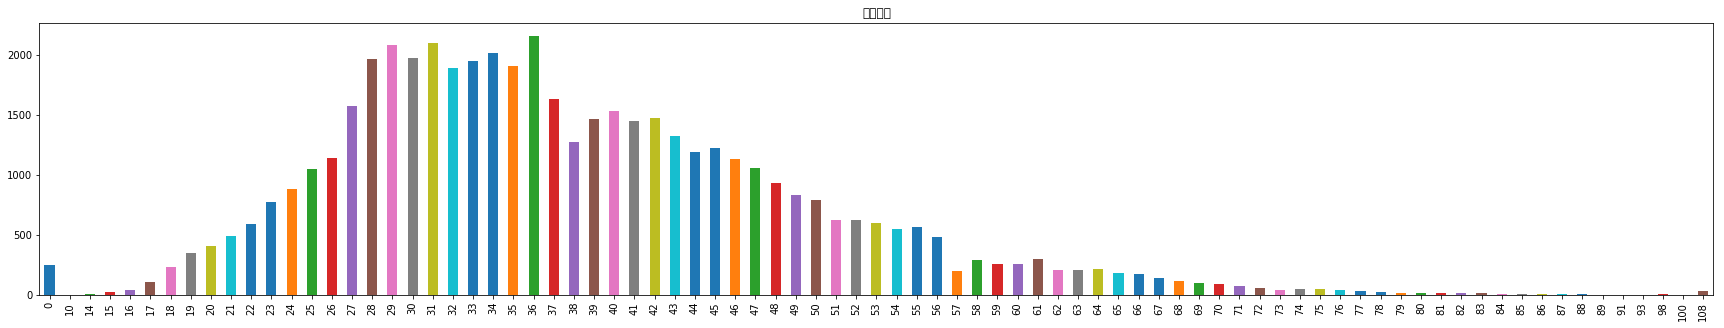

是否大学生客户
2


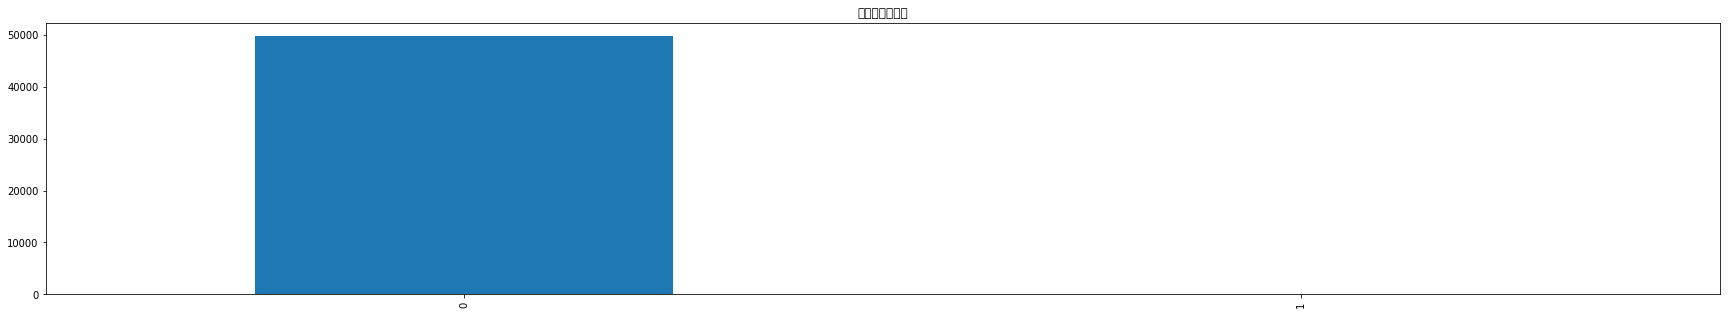

是否黑名单客户
2


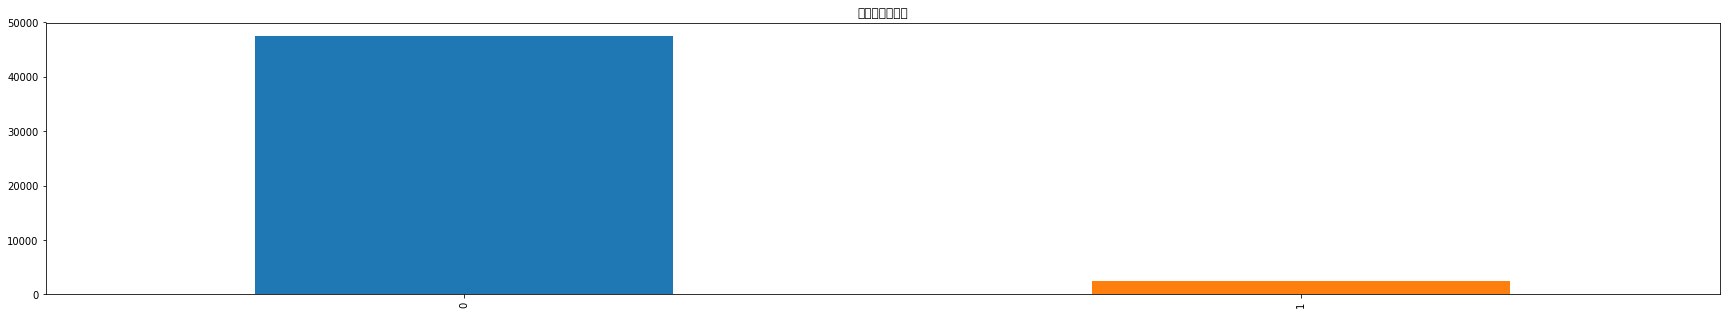

是否4G不健康客户
2


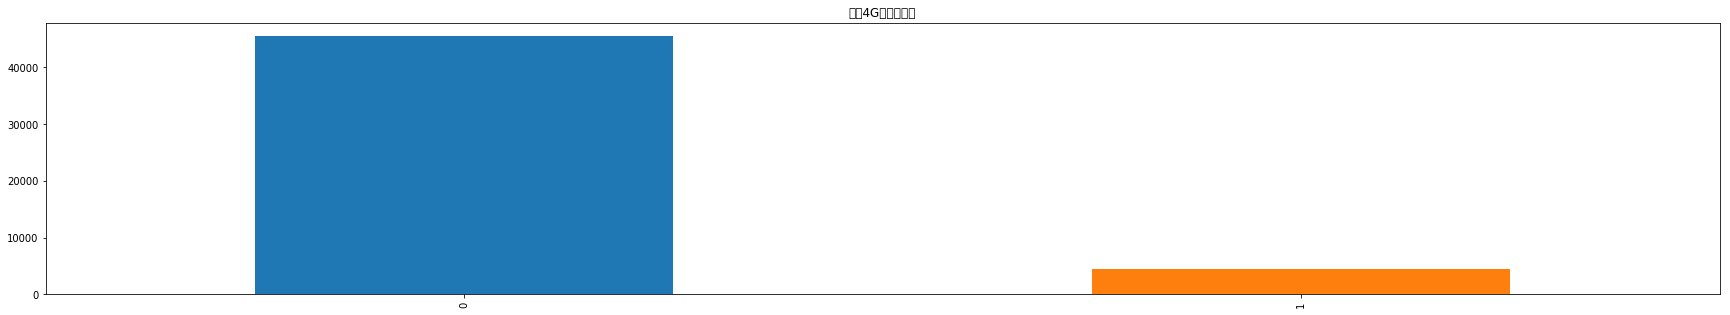

用户网龄（月）
280


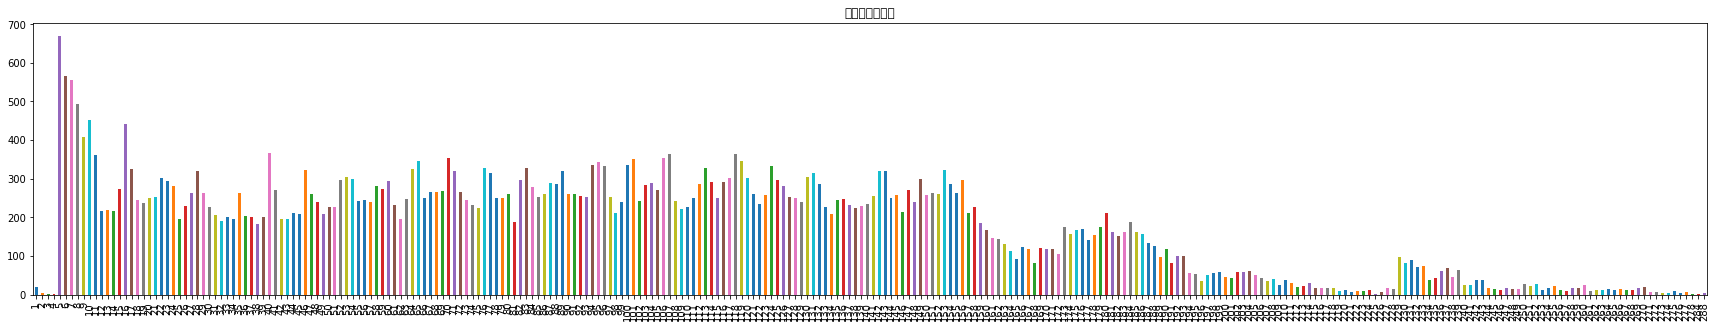

用户最近一次缴费距今时长（月）
2


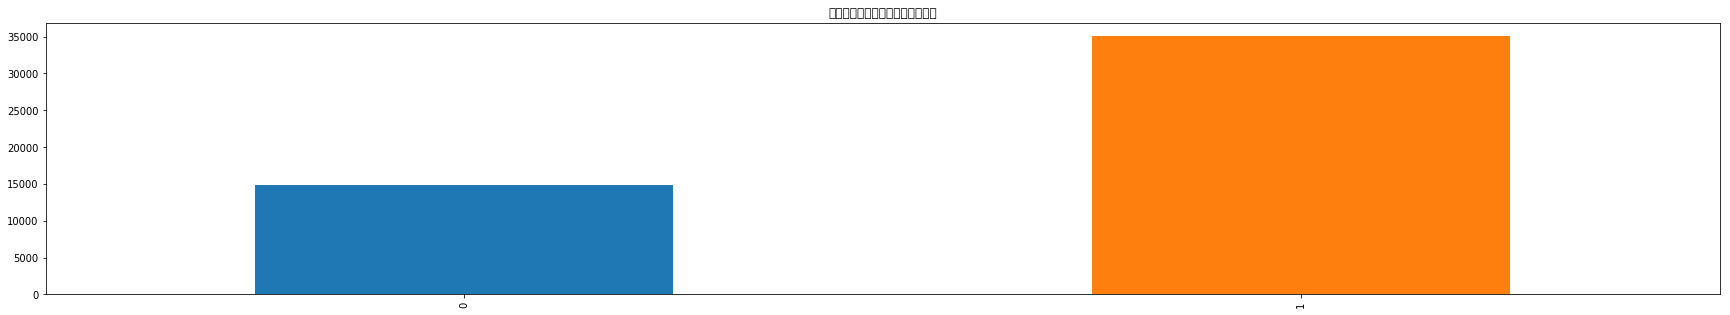

缴费用户最近一次缴费金额（元）
310


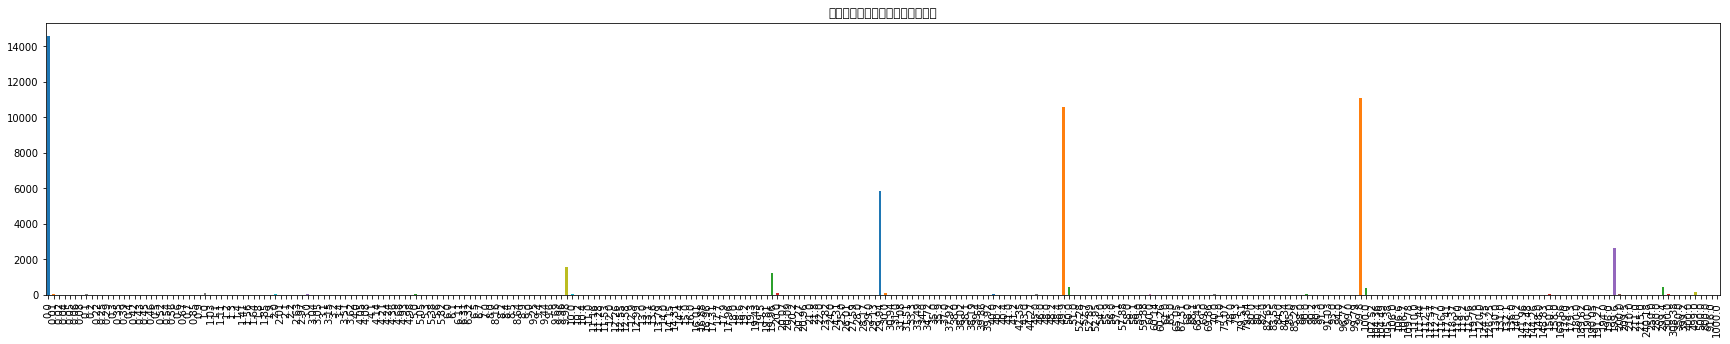

用户近6个月平均消费值（元）
18456
用户账单当月总费用（元）
11198
用户当月账户余额（元）
242


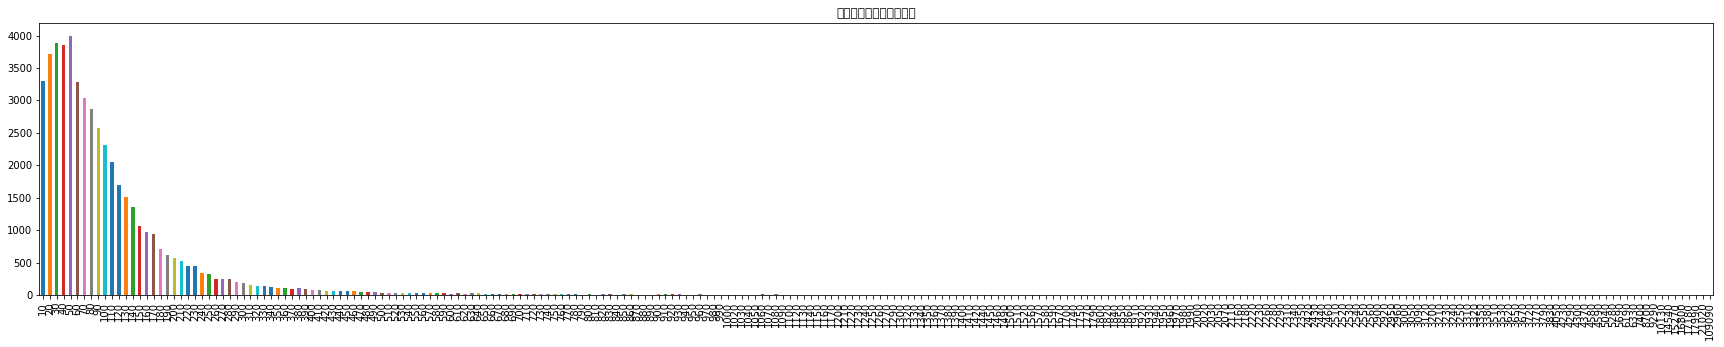

缴费用户当前是否欠费缴费
2


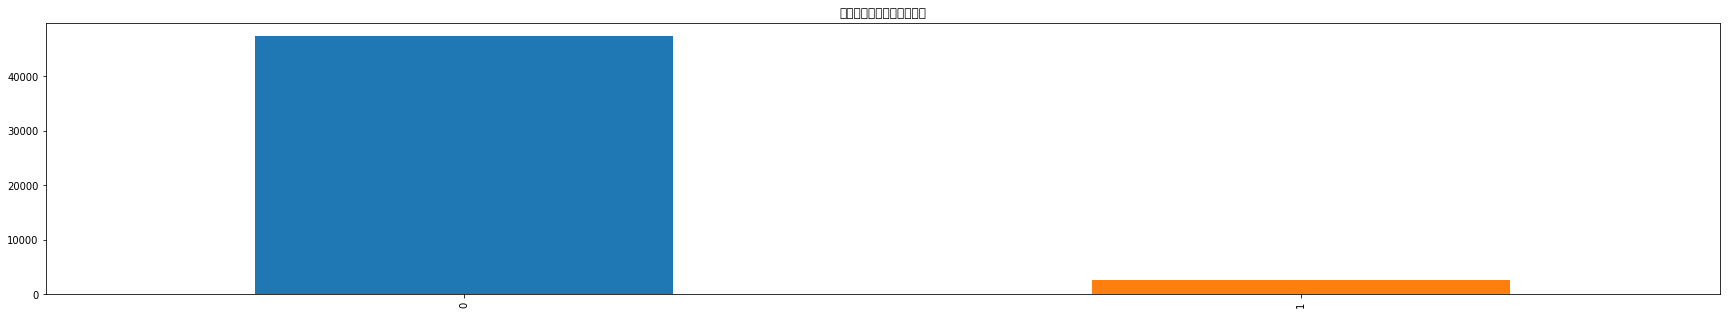

用户话费敏感度
6


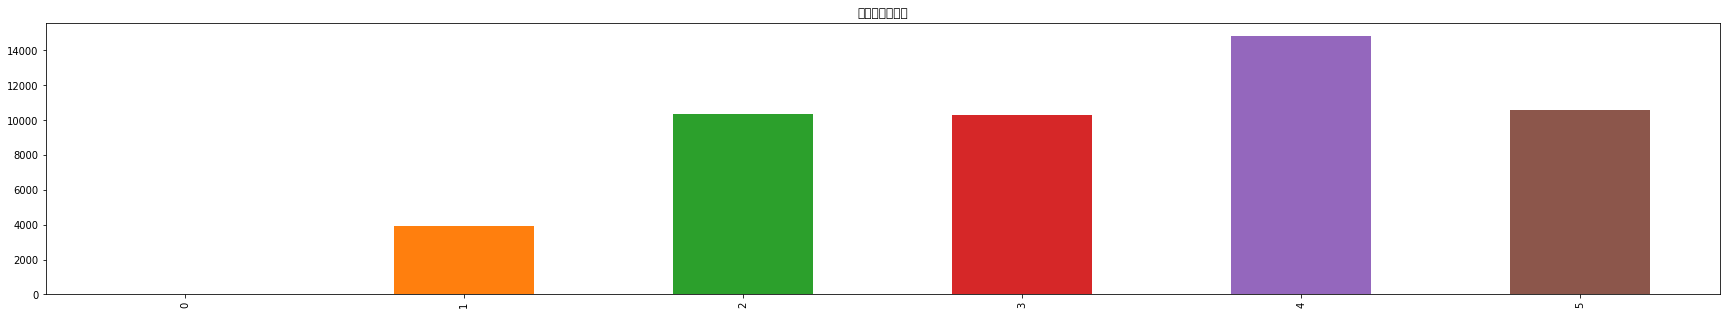

当月通话交往圈人数
458


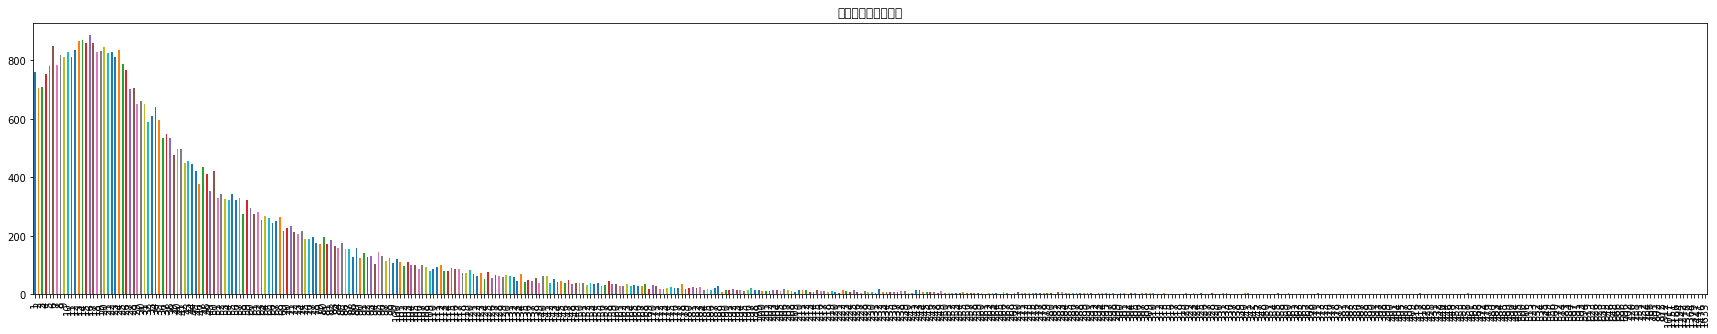

是否经常逛商场的人
2


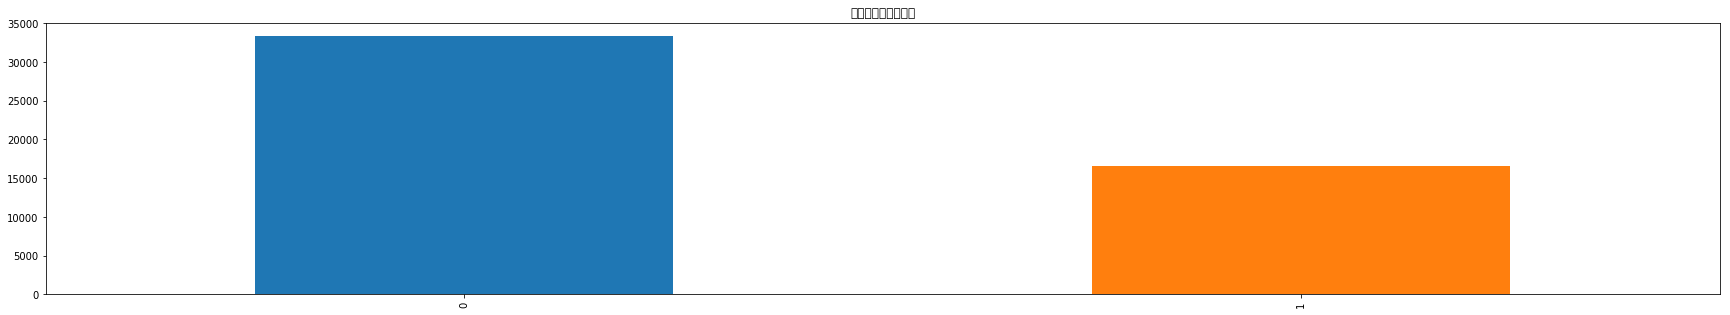

近三个月月均商场出现次数
93


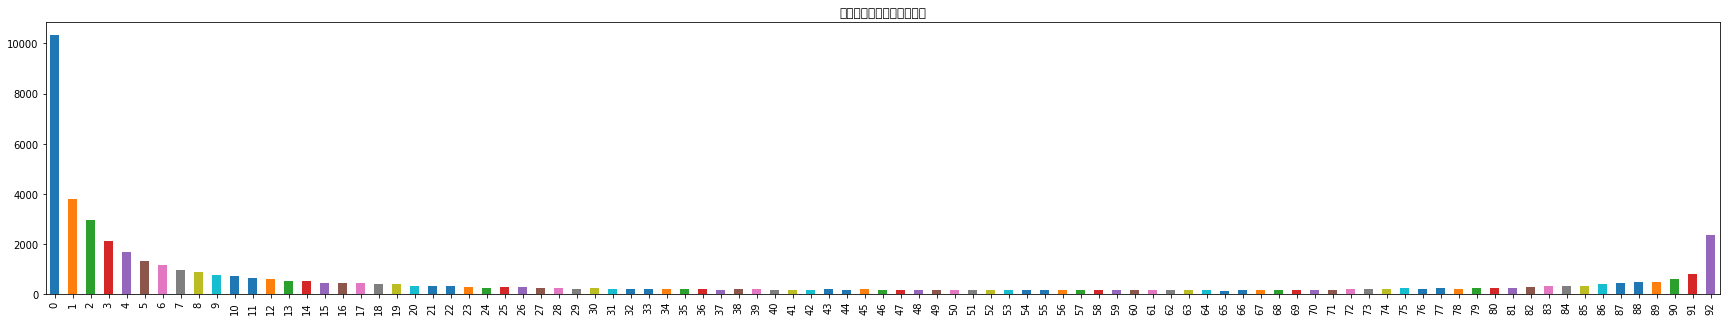

当月是否逛过福州仓山万达
2


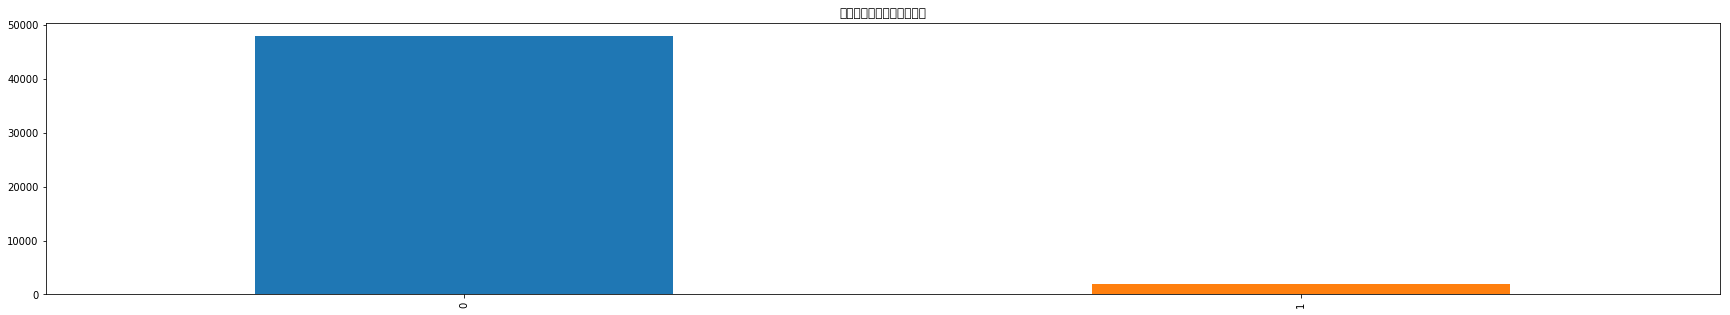

当月是否到过福州山姆会员店
2


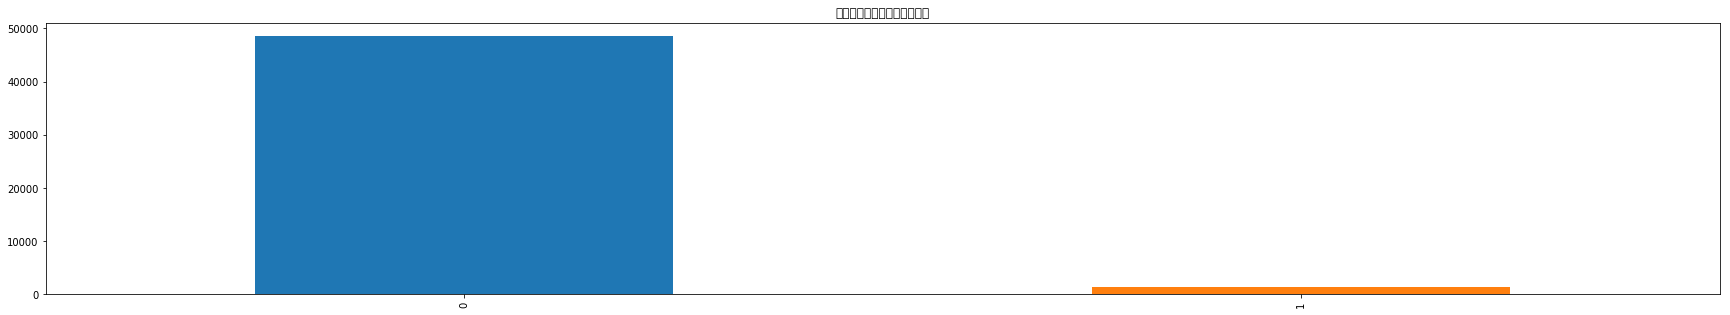

当月是否看电影
2


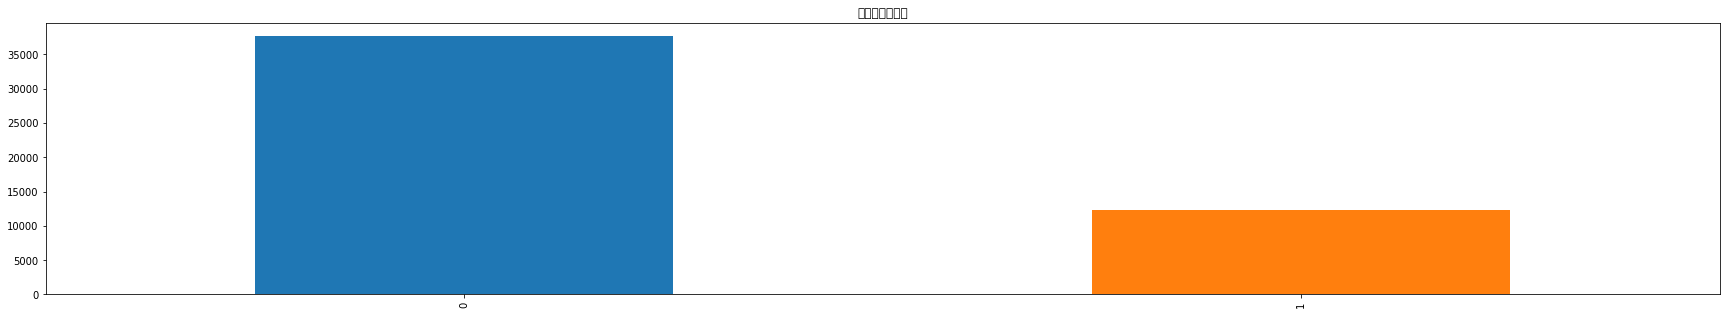

当月是否景点游览
2


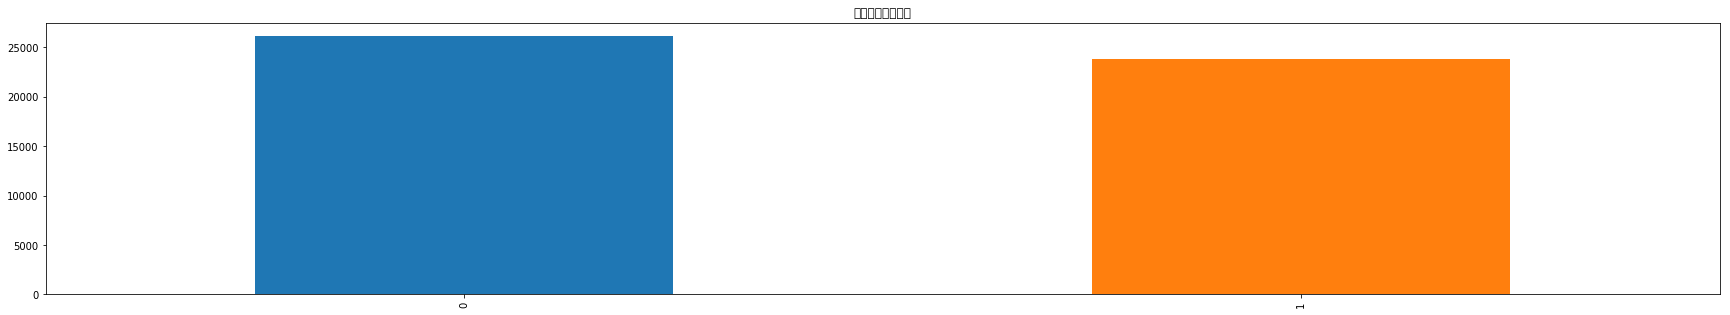

当月是否体育场馆消费
2


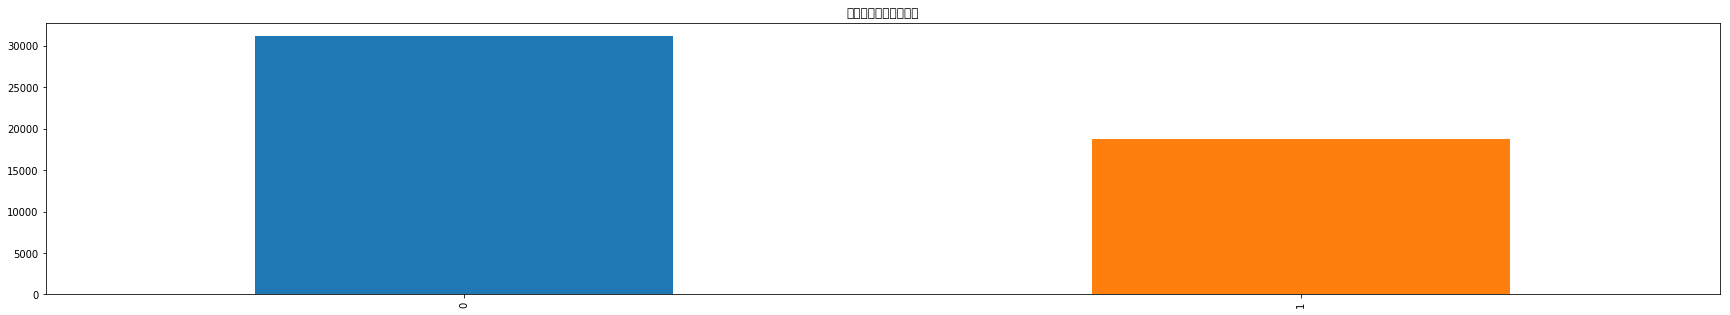

当月网购类应用使用次数
6138
当月物流快递类应用使用次数
172


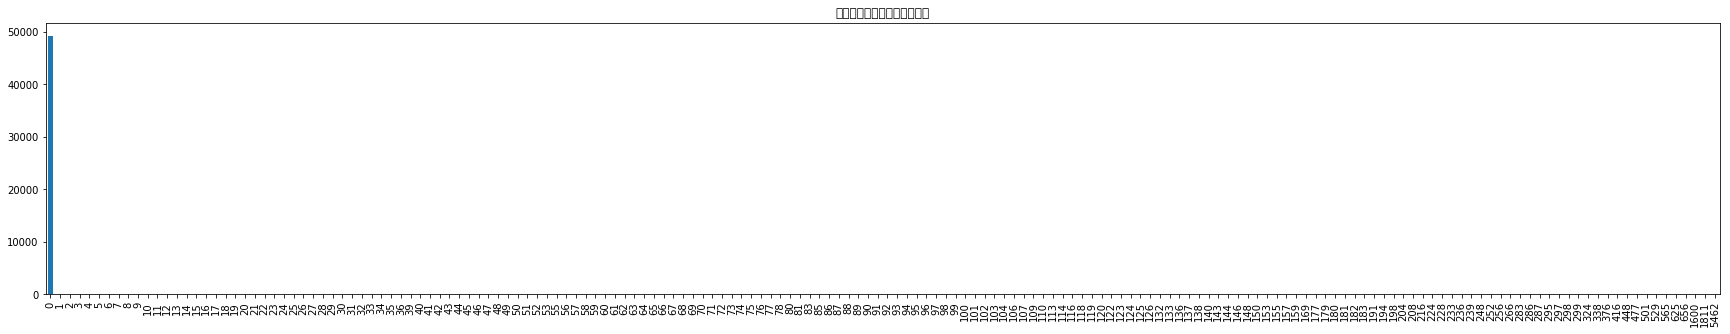

当月金融理财类应用使用总次数
5644
当月视频播放类应用使用次数
10981
当月飞机类应用使用次数
147


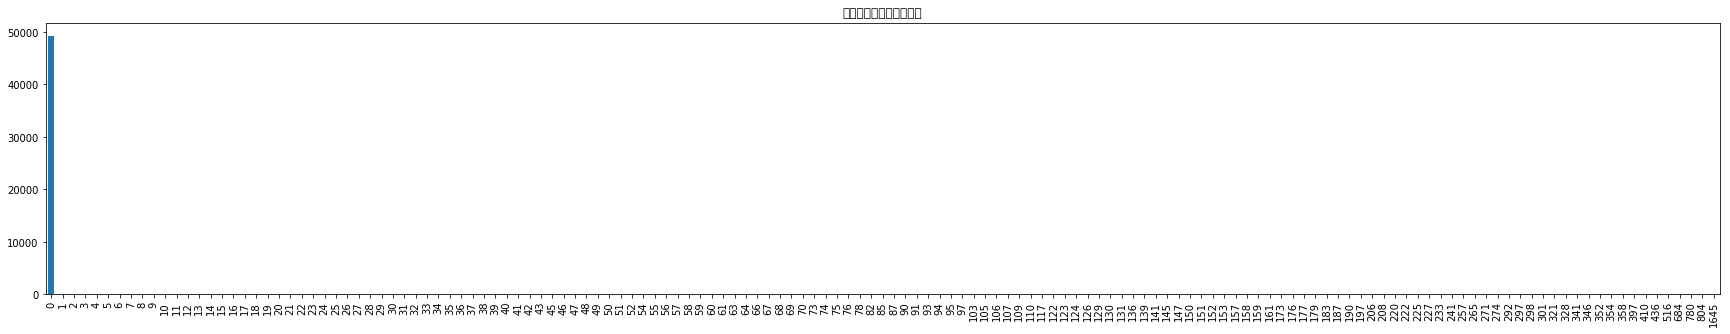

当月火车类应用使用次数
134


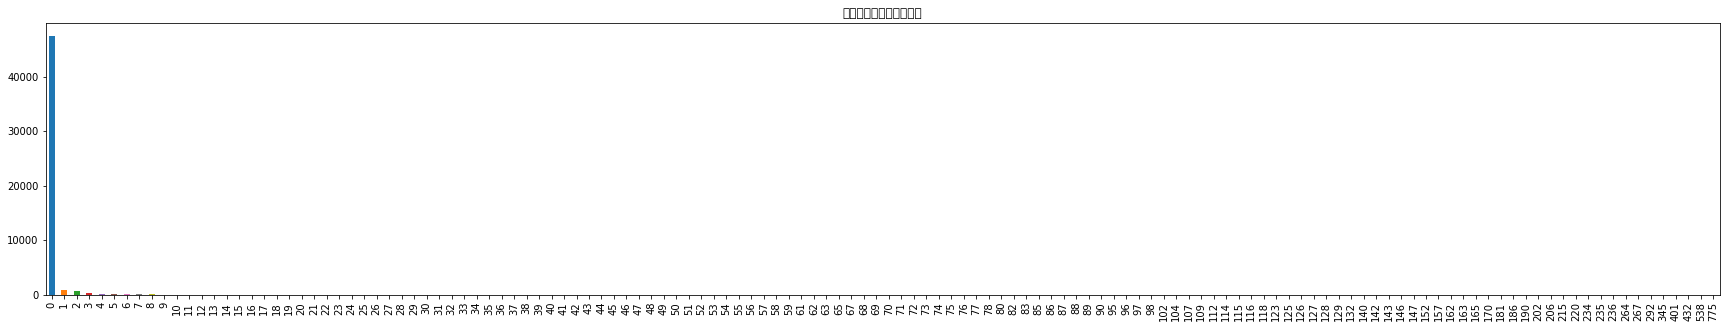

当月旅游资讯类应用使用次数
678


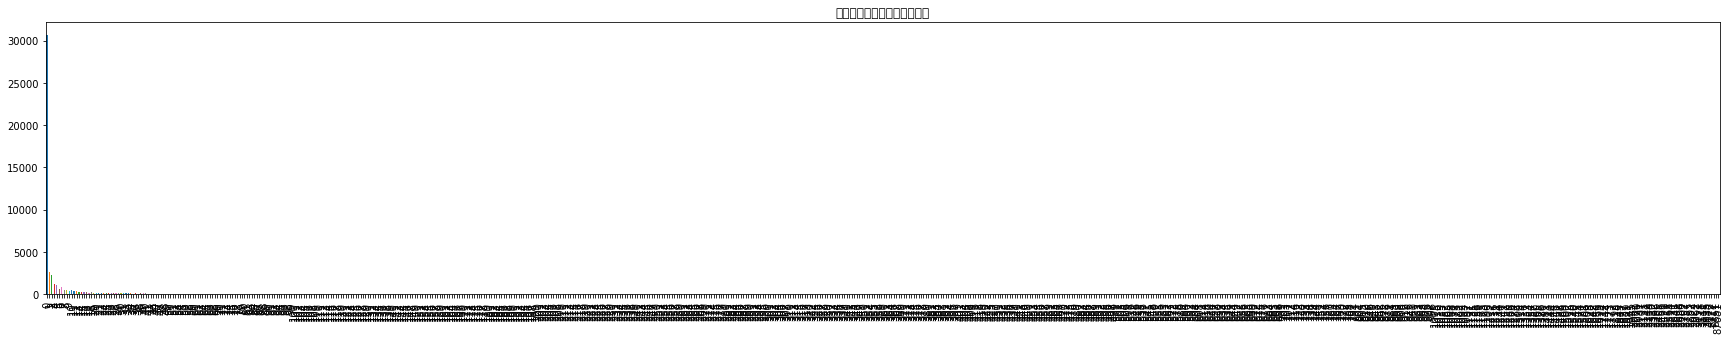

In [57]:
for f in test.columns:
    print(f)
    plt_cnt(test, f)